# <font color="DarkTeal"> OList Marketing and Retail Analytics - Capstone Project by Abhinav Kumar

##  <font color="DarkBlue"> Table of Contents:

### <font color="Blue"> Problem Statement - I
    
### <font color="Blue"> Problem Statement - II    
    
### <font color="#B9770E"> **Task 1:** <font color="Blue"> Importing libraries
    
### <font color="#B9770E"> **Task 2:** <font color="Blue"> Load and preliminary observation of data
- <font color= "#DE3163"> **Subtask 2.1:** <font color= "#FFBF00"> Read the dataset
- <font color= "#DE3163"> **Subtask 2.2:** <font color= "#FFBF00"> Preliminary Inspection of Raw Data
    
### <font color="#B9770E"> **Task 3:** <font color="Blue"> Preparing Data
- <font color= "#DE3163"> **Subtask 3.1:** <font color= "#FFBF00"> Cleaning, Imputing and Dropping values from dataframe
    
### <font color="#B9770E"> **Task 4:** <font color="Blue"> Merging the Dataframe 
    
### <font color="#B9770E"> **Task 5:** <font color="Blue"> Exploratory Data Analysis   
    
### <font color="#B9770E"> **Task 6:** <font color="Blue"> Exporting Cleaned Data

# <font color="#2980B9"> Problem Statement - I

<font color= "Olive" > In the recent past, e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”? 

<font color= "Olive" > To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving. 
    
<font color= "Olive" > Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.
    
<font color= "Olive" > Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. 

<font color= "Olive" > In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.   

# <font color="#2980B9"> Problem Statement - II

<font color= "Olive" > After developing an understanding of the problem statement and the dataset, it is important to think about your approach to solve the problem. 
It is always advisable to break down a complex problem into smaller, simpler ones. This is called structured problem solving.

<font color= "Olive" > The structured problem approach that you will be using here is the 80-20 rule of the Pareto analysis. In general, this 80-20 rule asserts that 80% of outcomes (or outputs) result from 20% of all causes (or inputs) for any given event. Again, the 80-20 number is not iron-clad and can be tweaked a little on a case by case basis. After using Pareto for your analysis let us see what all other important aspects are there that you need to consider to solve the problem.

# <font color="#2980B9"> Task 1: Importing Libraries

In [1]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings("ignore") # To ignore the warnings

In [2]:
# Import the numpy and pandas package

import pandas as pd  
import numpy as np
from math import sqrt

# Import visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Other libraries of use

import datetime  ## Datetime package
import os

In [3]:
# To view large outputs
pd.set_option('display.max_rows', 250)  ## Setting the number of rows to be displayed
pd.set_option('display.max_columns', 60)  ## Changing the number of columns to be displayed 
pd.set_option('display.width', 500)  ## Width of the display in characters

#  <font color="#2980B9"> Task 2: Load and preliminary observation of data

- ### <font color="IndianRed"> Subtask 2.1: Read the Dataset

- #### <font color="IndianRed"> Subtask 2.1.1: Orders

In [4]:
# Read all the information about raw data
raw_data = "Retail_dataset.xlsx" 
orders = pd.read_excel(io = raw_data, sheet_name = 'orders', header= 0, index_col= None)
orders.head()  ## Getting the first 5 rows of the dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [5]:
orders.columns # Columns in orders dataframe

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date'], dtype='object')

- #### <font color="IndianRed"> Subtask 2.1.2: order_items

In [6]:
# Read all the information about raw data
raw_data = "Retail_dataset.xlsx" 
order_items = pd.read_excel(io = raw_data, sheet_name = 'order_items', header= 0, index_col= None)
order_items.head()  ## Getting the first 5 rows of the dataset

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [7]:
order_items.columns # columns in order_items dataframe

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'shipping_charges'], dtype='object')

- #### <font color="IndianRed"> Subtask 2.1.3: customers

In [8]:
# Read all the information about raw data
raw_data = "Retail_dataset.xlsx" 
customers = pd.read_excel(io = raw_data, sheet_name = 'customers', header= 0, index_col= None)
customers.head()  ## Getting the first 5 rows of the dataset

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
customers.columns  # columns in customers dataframe

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], dtype='object')

- #### <font color="IndianRed"> Subtask 2.1.4: payments

In [10]:
# Read all the information about raw data
raw_data = "Retail_dataset.xlsx" 
payments = pd.read_excel(io = raw_data, sheet_name = 'payments', header= 0, index_col= None)
payments.head()  ## Getting the first 5 rows of the dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
payments.columns  # columns in payments dataframe

Index(['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')

- #### <font color="IndianRed"> Subtask 2.1.5: products

In [12]:
# Read all the information about raw data
raw_data = "Retail_dataset.xlsx" 
products = pd.read_excel(io = raw_data, sheet_name = 'products', header= 0, index_col= None)
products.head()  ## Getting the first 5 rows of the dataset

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [13]:
products.columns  # columns in products dataframe

Index(['product_id', 'product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], dtype='object')

- ### <font color="IndianRed"> Subtask 2.2: Preliminary Inspection of Raw Data

In [14]:
# User Defined Function for checking the numerical and categorical columns in dataset

def cat_num(data):
    num_cols = [i for i in data.columns if data.dtypes[i]!='object']
    cat_cols = [i for i in data.columns if data.dtypes[i]=='object']
    return len(num_cols),len(cat_cols), num_cols, cat_cols

In [15]:
# User Defined Function to check the class distribution for the categorical variables

def Value_Count(df):
    for i in df.columns:
        if df.dtypes[i]=='object':
            total = df[i].value_counts()
            percent= df[i].value_counts(normalize=True).round(4)*100
            
            
            tt=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
            print (i,tt,'\n\n')


In [16]:
# User Defined function to check the missing values, percentage and data types of the variable
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100).round(2)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(tt.sort_values(by='Total',ascending=False))

In [17]:
# Creating a function to check the summary of row wise missing value
def row_miss (x):
    a=x.isnull().sum(axis=1)
    a=a.to_frame()
    a.rename(columns = {0:'missing'}, inplace = True)
    b=a.groupby(['missing'])['missing'].count()
    return b

- #### <font color="IndianRed"> Subtask 2.2.1: 'orders' data

In [18]:
orders.shape ## Checking the number of rows and columns in the dataframe

(99441, 7)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are 99441 rows and 7 columns in the dataframe.

In [19]:
orders.info() ## Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> The datatypes of all variables in 'orders' are correct. 

- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> It seems 'order_approved_at' and 'order_delivered_timestamp' contains some missing values. We will confirm it later visually.

In [20]:
cat_num(orders)  # Determining the numerical and categorical columns in dataset

(4,
 3,
 ['order_purchase_timestamp',
  'order_approved_at',
  'order_delivered_timestamp',
  'order_estimated_delivery_date'],
 ['order_id', 'customer_id', 'order_status'])

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Initially, we have got 4 numerical and 3 categorical columns.

In [21]:
Value_Count(orders)  ## Value count for categorical variables.

order_id                                   Total  Percent
e481f51cbdc54678b7cc49136f2d6af7      1      0.0
f01059d0d674e1282df4e8fbbe015aa2      1      0.0
fbc17f0f2a2125054d5ac5c22d2d5120      1      0.0
9373150545066777b1cd2bc20e93cf8e      1      0.0
917399e96f92268dfa2c0351b1b75fba      1      0.0
...                                 ...      ...
6b8986012d61963295ffa3ea869aff86      1      0.0
be879f757debd3b384b540daa6ddd97e      1      0.0
ac3ce7eda1246f39509a505242fcc169      1      0.0
e801a93b3904ca9e8350f176a037047b      1      0.0
66dea50a8b16d9b4dee7af250b4be1a5      1      0.0

[99441 rows x 2 columns] 


customer_id                                   Total  Percent
8d50f5eadf50201ccdcedfb9e2ac8455     17     0.02
3e43e6105506432c953e165fb2acf44c      9     0.01
1b6c7548a2a1f9037c1fd3ddfed95f33      7     0.01
ca77025e7201e3b30c44b472ff346268      7     0.01
6469f99c1f9dfae7733b25662e7f1782      7     0.01
...                                 ...      ...
d6fe1d8f8260d270ec0

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> All 99441 values in field 'order_id' are found to be unique as it also happens to be a primary key and an unique identifier for an order in 'orders' table.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> We can observe that customer_id (which happens to be a unique identifier of a customer) is not unique as it contains some duplicates. 
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> Olist has a delivery success rate of roughly __97%__, indicating that it provides a solid delivery service, which is critical for any e-commerce business.
    
- <font color="DarkBlue"> Comment 4 : <font color="Darkorange"> 'order_status' contains categorical values which is categorised in different levels as it shows the progress of the status of the order. __For this capstone project, we are only interested in successfully 'delivered' orders. Rest are not useful for analysis.__

In [22]:
# Checking the total number of null values in the dataframe
missing_data(orders)

,Total,Percent,Types
order_delivered_timestamp,2965,2.98,datetime64[ns]
order_approved_at,160,0.16,datetime64[ns]
order_id,0,0.00,object
customer_id,0,0.00,object
order_status,0,0.00,object
order_purchase_timestamp,0,0.00,datetime64[ns]
order_estimated_delivery_date,0,0.00,datetime64[ns]


In [23]:
# Check the row wise missing counts in the dataframe
row_miss(orders)

missing
0    96462
1     2833
2      146
Name: missing, dtype: int64

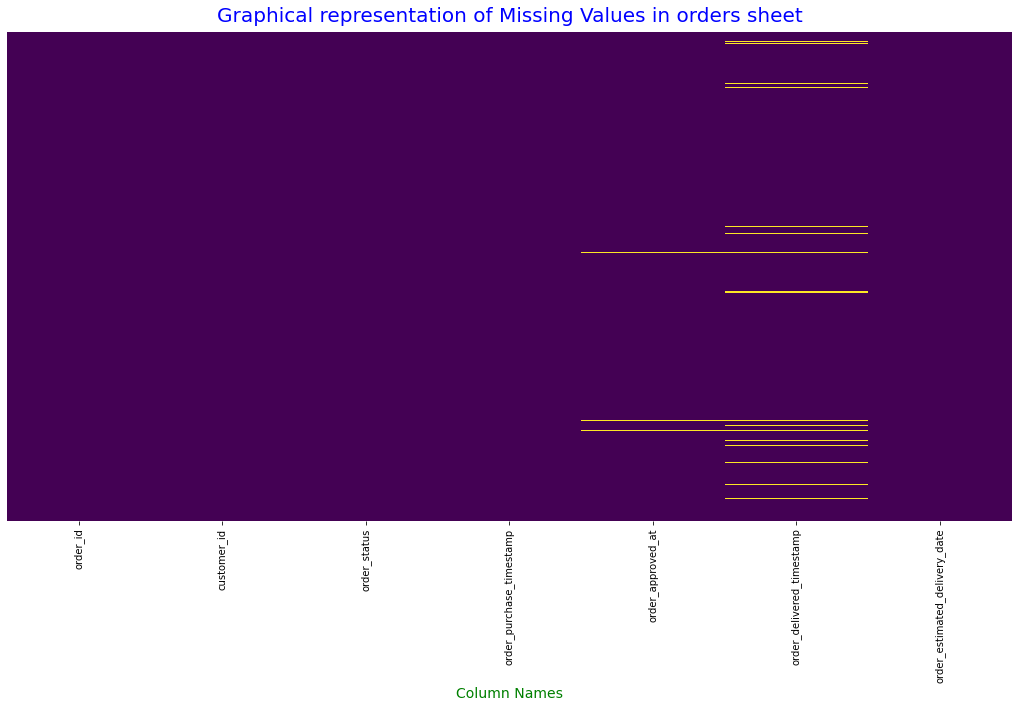

In [24]:
plt.figure(figsize=[18,9])
sns.heatmap(orders.isnull(),yticklabels=False,cbar=False,cmap='viridis',linecolor='White')

plt.title('Graphical representation of Missing Values in orders sheet', fontdict= {"fontsize" : 20, "fontweight": 10, "color":'Blue'}, pad=10) ## adding a title to the heatmap

plt.xlabel("Column Names", fontdict= {"fontsize" : 14, "fontweight": 10, "color":'Green'})  ## Setting x-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> 'order_approved_at' and 'order_delivered_timestamp' contains some missing values represented with yellow colour. 
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> 'order_approved_at' has missing values may be because the order did not get approved by the seller. 
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> 'order_delivered_timestamp' has missing values may be because it could be related with the 'order_status' as where the 'order_status' is other than 'delivered', contains missing value.

- #### <font color="IndianRed"> Subtask 2.2.2: 'order_items' data

In [25]:
order_items.shape ## Checking the number of rows and columns in the dataframe

(112650, 6)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are 112650 rows and 6 columns in the dataframe.

In [26]:
order_items.info() ## Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> The datatypes of all variables in 'order_items' are correct. 

- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> It seems 'order_items' contains no missing values. We will confirm it later visually.

In [27]:
# Checking the numerical and categorical columns in dataset
cat_num(order_items)

(3,
 3,
 ['order_item_id', 'price', 'shipping_charges'],
 ['order_id', 'product_id', 'seller_id'])

In [28]:
Value_Count(order_items)  ## Value count for categorical variables.

order_id                                   Total  Percent
8272b63d03f5f79c56e9e4120aec44ef     21     0.02
1b15974a0141d54e36626dca3fdc731a     20     0.02
ab14fdcfbe524636d65ee38360e22ce8     20     0.02
9ef13efd6949e4573a18964dd1bbe7f5     15     0.01
428a2f660dc84138d969ccd69a0ab6d5     15     0.01
...                                 ...      ...
5a0911d70c1f85d3bed0df1bf693a6dd      1     0.00
5a082b558a3798d3e36d93bfa8ca1eae      1     0.00
5a07264682e0b8fbb3f166edbbffc6e8      1     0.00
5a071192a28951b76774e5a760c8c9b7      1     0.00
fffe41c64501cc87c801fd61db3f6244      1     0.00

[98666 rows x 2 columns] 


product_id                                   Total  Percent
aca2eb7d00ea1a7b8ebd4e68314663af    527     0.47
99a4788cb24856965c36a24e339b6058    488     0.43
422879e10f46682990de24d770e7f83d    484     0.43
389d119b48cf3043d311335e499d9c6b    392     0.35
368c6c730842d78016ad823897a372db    388     0.34
...                                 ...      ...
dbc42f8ad8afd0147a5a

In [29]:
# Checking how many items most of the customers purchase 
it_count_df=pd.DataFrame(order_items['order_item_id'].value_counts())
it_count_df['percent_of_number_of_orders']=round(order_items['order_item_id'].value_counts(normalize=True),4)*100
it_count_df=it_count_df.reset_index()
it_count_df.columns=['number_of_items','number_of_orders','percent_of_number_of_orders']
it_count_df

,number_of_items,number_of_orders,percent_of_number_of_orders
0,1,98666,87.59
1,2,9803,8.70
2,3,2287,2.03
3,4,965,0.86
4,5,460,0.41
5,6,256,0.23
6,7,58,0.05
7,8,36,0.03
8,9,28,0.02
9,10,25,0.02


**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> __87.59%__ customers ordered only 1 item which is followed by customers who bought 2 or 3 items stood at __8.70%__ and __2.03%__ respectively. And these customers who bought 1 item or 2 or 3 items sum up to __98.32%__.

In [30]:
# Checking the total number of null values in the dataset
missing_data(order_items)

,Total,Percent,Types
order_id,0,0.0,object
order_item_id,0,0.0,int64
product_id,0,0.0,object
seller_id,0,0.0,object
price,0,0.0,float64
shipping_charges,0,0.0,float64


In [31]:
# Check the row wise missing counts in the dataframe
row_miss(order_items)

missing
0    112650
Name: missing, dtype: int64

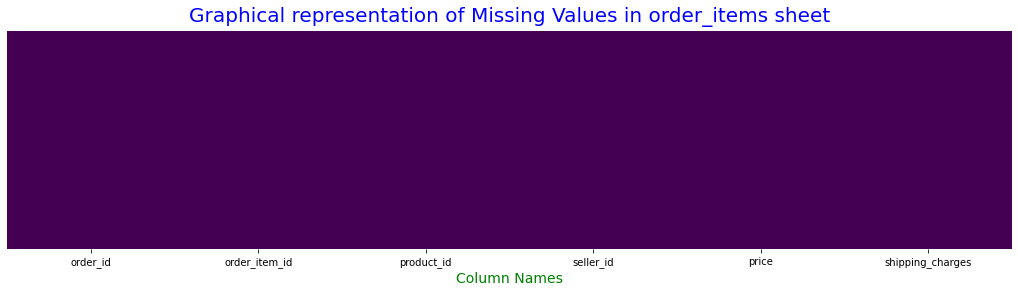

In [32]:
# Graphical representation of the missing values
plt.figure(figsize=[18,4])
sns.heatmap(order_items.isnull(),yticklabels=False,cbar=False,cmap='viridis',linecolor='White')

plt.title('Graphical representation of Missing Values in order_items sheet', fontdict= {"fontsize" : 20, "fontweight": 10, "color":'Blue'}, pad=10) ## adding a title to the heatmap

plt.xlabel("Column Names", fontdict= {"fontsize" : 14, "fontweight": 10, "color":'Green'})  ## Setting x-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are no missing values in the dataframe otherwise it would have been marked with yellow colour.

- #### <font color="IndianRed"> Identifying outliers and examining numerical fields

In [33]:
order_items_num = order_items[['price', 'shipping_charges']]
order_items_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary for the numeric columns 

,price,shipping_charges
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
0%,0.850000,0.000000
1%,9.990000,4.419800
10%,23.800000,8.730000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000


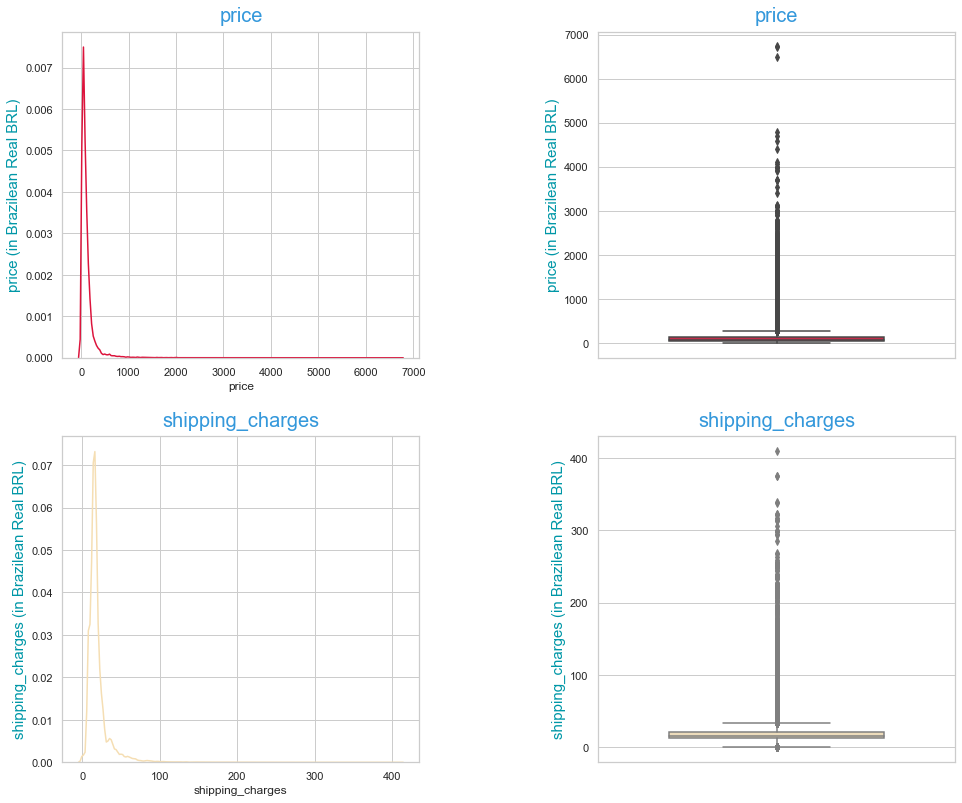

In [34]:
# Plotting the subplot of boxplots for all numerical variables in the dataset.

plt.figure(figsize=(16, 14)) 
plt.subplots_adjust(top=0.85, wspace= 0.5, hspace= 0.24)  ## setting the width of the padding between subplots

colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters


#  Distplot for the 'price' column.
plt.subplot(2,2,1)
sns.distplot(order_items.price, color= 'Crimson', kde=True, hist=False)
plt.title('price' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('price (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'price' column.
plt.subplot(2,2,2)
sns.boxplot(y = 'price', data = order_items, width=0.6, color= 'Crimson')
plt.title('price' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('price (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'shipping_charges' column.
plt.subplot(2,2,3)
sns.distplot(order_items.shipping_charges, kde=True, hist=False, color= 'Wheat')
plt.title('shipping_charges' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('shipping_charges (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'shipping_charges' column.
plt.subplot(2,2,4)
sns.boxplot(y = 'shipping_charges', data = order_items, width=0.6, color= 'Wheat')
plt.title('shipping_charges' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('shipping_charges (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> By obsering both statistical data and distplot in subplot, we can confirm that 'price' and 'shipping_charges' data is positively skewed.
 
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> The median of selling price is __BRL74.99__ (Brazilean Real or BRL) while the mean of selling price is __BRL120.65__. 
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> The median shipping_charges is __BRL16.26__ (Brazilean Real or BRL) while the mean shipping_charges is __BRL19.99__.

- #### <font color="IndianRed"> Subtask 2.2.3: 'customers' data

In [35]:
customers.shape ## Checking the number of rows and columns in the dataframe

(99441, 4)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are 99441 rows and 4 columns in the dataframe.

In [36]:
customers.info() ## Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> In first glance, I observed that there are no missing values in customers dataframe and the datatypes of variables are also correct. 

In [37]:
# Checking the numerical and categorical columns in dataset
cat_num(customers)

(1,
 3,
 ['customer_zip_code_prefix'],
 ['customer_id', 'customer_city', 'customer_state'])

In [38]:
Value_Count(customers)  ## Value count for categorical variables.

customer_id                                   Total  Percent
8d50f5eadf50201ccdcedfb9e2ac8455     17     0.02
3e43e6105506432c953e165fb2acf44c      9     0.01
1b6c7548a2a1f9037c1fd3ddfed95f33      7     0.01
ca77025e7201e3b30c44b472ff346268      7     0.01
6469f99c1f9dfae7733b25662e7f1782      7     0.01
...                                 ...      ...
081f07439678af2da7755a0aa572154d      1     0.00
9c57789a6a587f4efcfb01e36c106014      1     0.00
9e4c21635f640562de1a6976374fba03      1     0.00
06c0ea6ee892364d1608ee47aa9f56a0      1     0.00
84732c5050c01db9b23e19ba39899398      1     0.00

[96096 rows x 2 columns] 


customer_city                    Total  Percent
sao paulo          15540    15.63
rio de janeiro      6882     6.92
belo horizonte      2773     2.79
brasilia            2131     2.14
curitiba            1521     1.53
...                  ...      ...
bequimao               1     0.00
andarai                1     0.00
vargem grande          1     0.00
curvelandia      

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> As customer_id is the primary key in customers dataframe, it seems it has some duplicate values. So, we have to get rid off these duplicates.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> There are __4119__ unique values in customer_city field which means OList business is spread in these cities. __15.63%__ of customers of OList resides in __Sao Paulo__ city followed by __Rio de Janeiro__ city with total of __6.92%__.
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> There are 27 unique values in customer_state field. __Sao Paulo (SP)__ state where __41.98%__ of OList customers hail from followed by State of __Rio de Janeiro (RJ)__ and __Minas Gerais (MG)__ with __12.92%__ and __11.70%__ respectively.

In [39]:
# Checking the total number of null values in the dataset
missing_data(customers)

,Total,Percent,Types
customer_id,0,0.0,object
customer_zip_code_prefix,0,0.0,int64
customer_city,0,0.0,object
customer_state,0,0.0,object


In [40]:
# Check the row wise missing counts in the dataframe
row_miss(customers)

missing
0    99441
Name: missing, dtype: int64

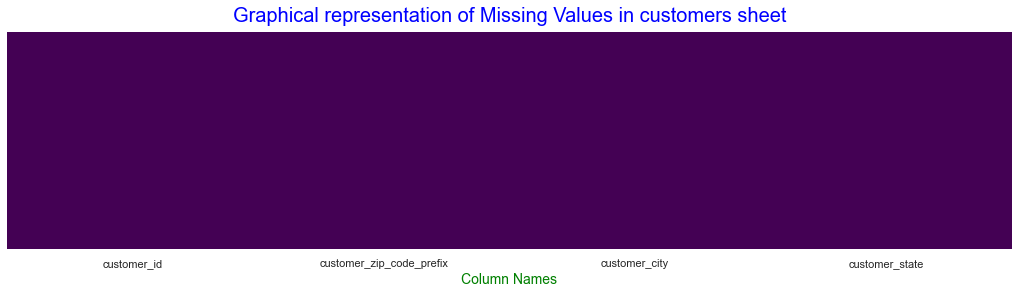

In [41]:
# Graphical representation of the missing values
plt.figure(figsize=[18,4])
sns.heatmap(customers.isnull(),yticklabels=False,cbar=False,cmap='viridis',linecolor='White')

plt.title('Graphical representation of Missing Values in customers sheet', fontdict= {"fontsize" : 20, "fontweight": 10, "color":'Blue'}, pad=10) ## adding a title to the heatmap

plt.xlabel("Column Names", fontdict= {"fontsize" : 14, "fontweight": 10, "color":'Green'})  ## Setting x-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are no missing values in the dataframe otherwise it would have been represented by yellow colour in above visualisation.

- #### <font color="IndianRed"> Subtask 2.2.4: 'payments' data

In [42]:
payments.shape ## Checking the number of rows and columns in the dataframe

(103886, 5)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are 103886 rows and 5 columns in the dataframe.

In [43]:
payments.info() ## Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> In first glance, I observed that there are no missing values in payments dataframe and the datatypes of variables are also correct. 

In [44]:
# Checking the numerical and categorical columns in dataset
cat_num(payments)

(3,
 2,
 ['payment_sequential', 'payment_installments', 'payment_value'],
 ['order_id', 'payment_type'])

In [45]:
Value_Count(payments)  ## Value count for categorical variables.

order_id                                   Total  Percent
fa65dad1b0e818e3ccc5cb0e39231352     29     0.03
ccf804e764ed5650cd8759557269dc13     26     0.03
285c2e15bebd4ac83635ccc563dc71f4     22     0.02
895ab968e7bb0d5659d16cd74cd1650c     21     0.02
fedcd9f7ccdc8cba3a18defedd1a5547     19     0.02
...                                 ...      ...
6d2a30c9b7dcee3ed507dc9a601f99e7      1     0.00
a7737f6d9208dd56ea498a322ed3c37f      1     0.00
646e62df54f3e236eb6d5ff3b31429b8      1     0.00
e115da7a49ec2acf622e1f31da65cfb9      1     0.00
28bbae6599b09d39ca406b747b6632b1      1     0.00

[99440 rows x 2 columns] 


payment_type              Total  Percent
credit_card  76795    73.92
wallet       19784    19.04
voucher       5775     5.56
debit_card    1529     1.47
not_defined      3     0.00 




**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> 'order_id' consists of some duplicate values which will be inspected in more depth later in this project.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> __'credit_card'__ is the most commonly used to pay for an order which itself constitutes __73.92%__ of overall payments followed by wallet which shares __19.04%__ with other available pay methods.


In [46]:
# Checking the total number of null values in the dataset
missing_data(payments)

,Total,Percent,Types
order_id,0,0.0,object
payment_sequential,0,0.0,int64
payment_type,0,0.0,object
payment_installments,0,0.0,int64
payment_value,0,0.0,float64


In [47]:
# Check the row wise missing counts in the dataframe
row_miss(payments)

missing
0    103886
Name: missing, dtype: int64

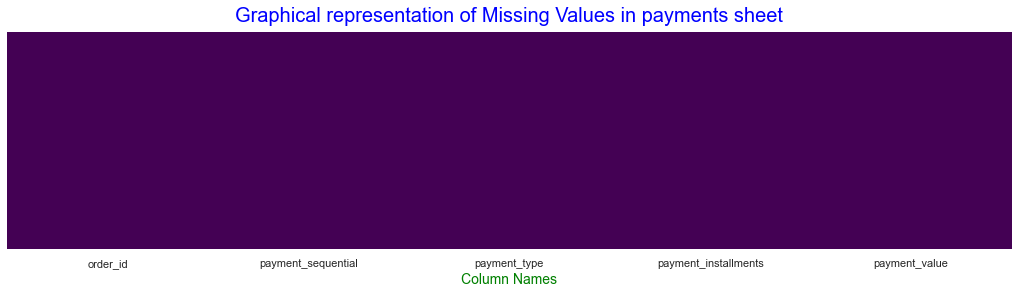

In [48]:
# Graphical representation of the missing values
plt.figure(figsize=[18,4])
sns.heatmap(payments.isnull(),yticklabels=False,cbar=False,cmap='viridis',linecolor='White')

plt.title('Graphical representation of Missing Values in payments sheet', fontdict= {"fontsize" : 20, "fontweight": 10, "color":'Blue'}, pad=10) ## adding a title to the heatmap

plt.xlabel("Column Names", fontdict= {"fontsize" : 14, "fontweight": 10, "color":'Green'})  ## Setting x-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are no missing values in the dataframe otherwise it would have been represented in the heatmap by yellow colour.

- #### <font color="IndianRed"> Identifying outliers and examining numerical fields

In [49]:
payments_num = payments[['payment_sequential', 'payment_installments', 'payment_value']]
payments_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary for the numeric columns 

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
0%,1.000000,0.000000,0.000000
1%,1.000000,1.000000,6.690000
10%,1.000000,1.000000,35.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500


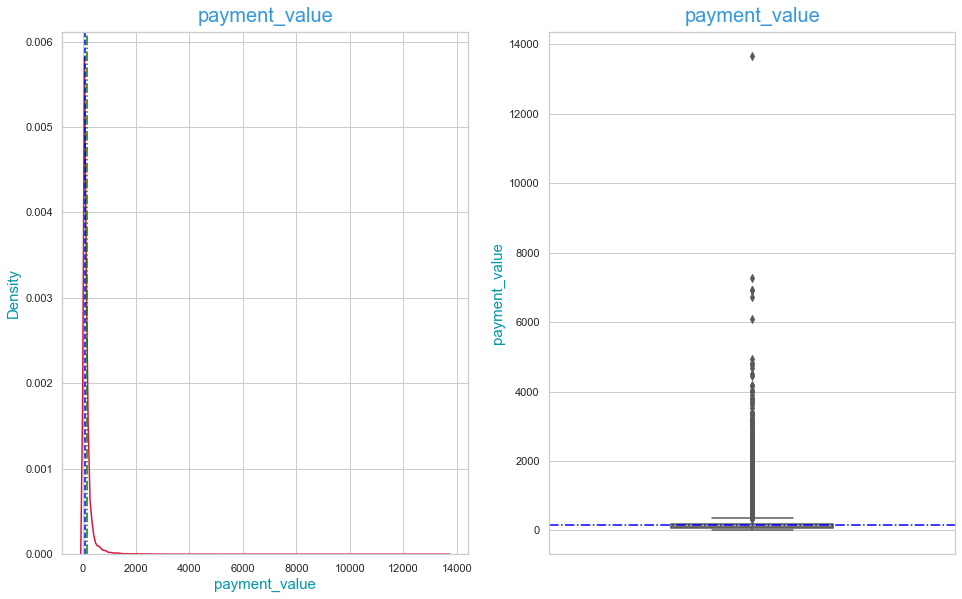

In [50]:
# Plotting the subplot of boxplots for all numerical variables in the dataset.
plt.figure(figsize=(16, 10)) 
plt.subplots_adjust(top=0.85, wspace= 0.2, hspace= 0.2)  ## setting the width of the padding between subplots

colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters


# Distplot for the 'payment_value' column.
plt.subplot(1,2,1)
sns.distplot(payments.payment_value, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(payments.payment_value.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(payments.payment_value.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('payment_value' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('payment_value', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'payment_value' column.
plt.subplot(1,2,2)
sns.boxplot(y = 'payment_value', data = payments, width=0.4, color= 'DarkKhaki') # Plotting boxplot
plt.axhline(payments.payment_value.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('payment_value' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('payment_value', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

In [51]:
# Checking how many items most of the customers purchase 
pay_inst_df=pd.DataFrame(payments['payment_installments'].value_counts())
pay_inst_df['percent_of_number_of_orders']=round(payments['payment_installments'].value_counts(normalize=True),4)*100
pay_inst_df=pay_inst_df.reset_index()
pay_inst_df.columns=['number_of_installments(in months)','number_of_payments','percent_of_number_of_payments']
pay_inst_df

,number_of_installments(in months),number_of_payments,percent_of_number_of_payments
0,1,52546,50.58
1,2,12413,11.95
2,3,10461,10.07
3,4,7098,6.83
4,10,5328,5.13
5,5,5239,5.04
6,8,4268,4.11
7,6,3920,3.77
8,7,1626,1.57
9,9,644,0.62


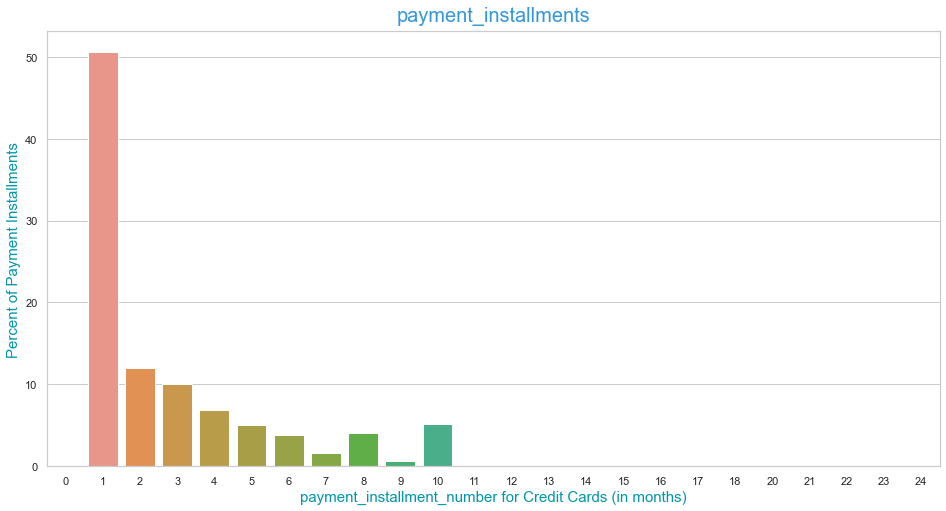

In [52]:
plt.figure(figsize=(16, 8)) 

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters

# Barplot for the 'payment_installments' column.

sns.barplot(x = pay_inst_df['number_of_installments(in months)'],y = pay_inst_df['percent_of_number_of_payments'], data = pay_inst_df) # Plotting countplot
plt.title('payment_installments' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('payment_installment_number for Credit Cards (in months)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Percent of Payment Installments', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> More than 50 percent of customers has made their payments by opting for 1 month installment using their credit card.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> Around 12 percent of customers opted for 2 months payment installment by using their credit card.
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> Approximately 80 percent of payments that olist takes comes within 4 months in the form of credit card payment.

- #### <font color="IndianRed"> Subtask 2.2.5: 'products' data

In [53]:
products.shape ## Checking the number of rows and columns in the dataframe

(32951, 6)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are 32951 rows and 6 columns in the dataframe.

In [54]:
products.info() ## Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> In the first glimpse, we can notice that there may be  missing values in this dataset.

- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> Datatype of variables are correct in products dataframe. 

In [55]:
# Checking the numerical and categorical columns in dataset
cat_num(products)

(4,
 2,
 ['product_weight_g',
  'product_length_cm',
  'product_height_cm',
  'product_width_cm'],
 ['product_id', 'product_category_name'])

In [56]:
Value_Count(products)  ## Value count for categorical variables.

product_id                                   Total  Percent
1e9e8ef04dbcff4541ed26657ea517e5      1      0.0
d05cc9afc85771f597cf4bc9d8f12546      1      0.0
71b7afd92c42feab780d5ea512fc7348      1      0.0
5c5f3e091101bea69642eb3dd145b17d      1      0.0
16d47089f9bc7f16de16cc4bd3b9dd49      1      0.0
...                                 ...      ...
c154987c6780d1a2b579aae00e53485f      1      0.0
1a6c9da4039deae58c2b769f049ae121      1      0.0
4cb35e544a1de008f37e069f172f964e      1      0.0
b34b2c889f5b26963569cf421254e121      1      0.0
106392145fca363410d287a815be6de4      1      0.0

[32951 rows x 2 columns] 


product_category_name                                          Total  Percent
toys                                     24725    75.42
bed_bath_table                             789     2.41
sports_leisure                             721     2.20
furniture_decor                            687     2.10
health_beauty                              648     1.98
housewares    

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> More than __75%__ of products sold are __toys__ and rest products categories constitutes __25%__ of olist business.

In [57]:
# Checking the total number of null values in the dataset
missing_data(products)

,Total,Percent,Types
product_category_name,170,0.52,object
product_weight_g,2,0.01,float64
product_length_cm,2,0.01,float64
product_height_cm,2,0.01,float64
product_width_cm,2,0.01,float64
product_id,0,0.00,object


In [58]:
# Check the row wise missing counts in the dataframe
row_miss(products)

missing
0    32779
1      170
4        2
Name: missing, dtype: int64

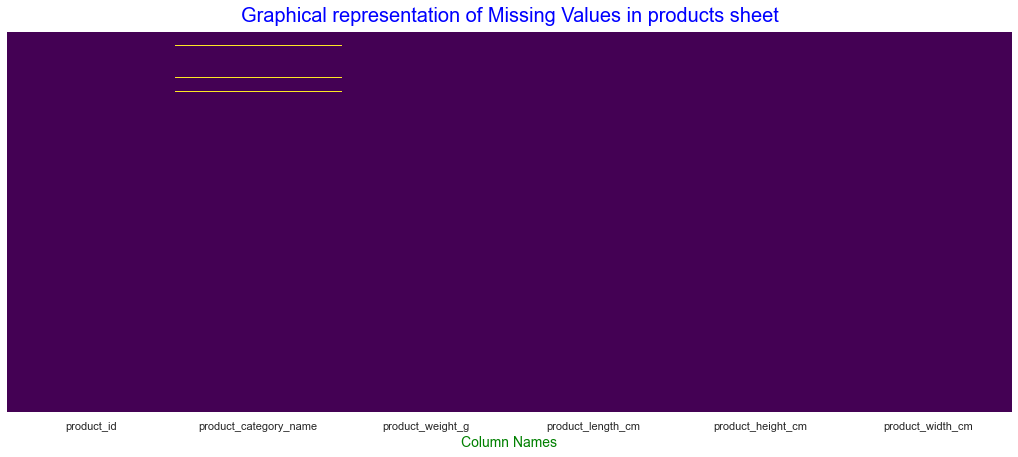

In [59]:
# Graphical representation of the missing values
plt.figure(figsize=[18,7])
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap='viridis',linecolor='White')

plt.title('Graphical representation of Missing Values in products sheet', fontdict= {"fontsize" : 20, "fontweight": 10, "color":'Blue'}, pad=10) ## adding a title to the heatmap

plt.xlabel("Column Names", fontdict= {"fontsize" : 14, "fontweight": 10, "color":'Green'})  ## Setting x-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> There are a few missing values in this dataframe which is represented in the heatmap in yellow colour.

- #### <font color="IndianRed"> Identifying outliers and examining numerical fields

In [60]:
products_num = products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
products_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary for the numeric columns 

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
0%,0.000000,7.000000,2.000000,6.000000
1%,60.000000,16.000000,2.000000,11.000000
10%,175.000000,16.000000,4.000000,11.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000


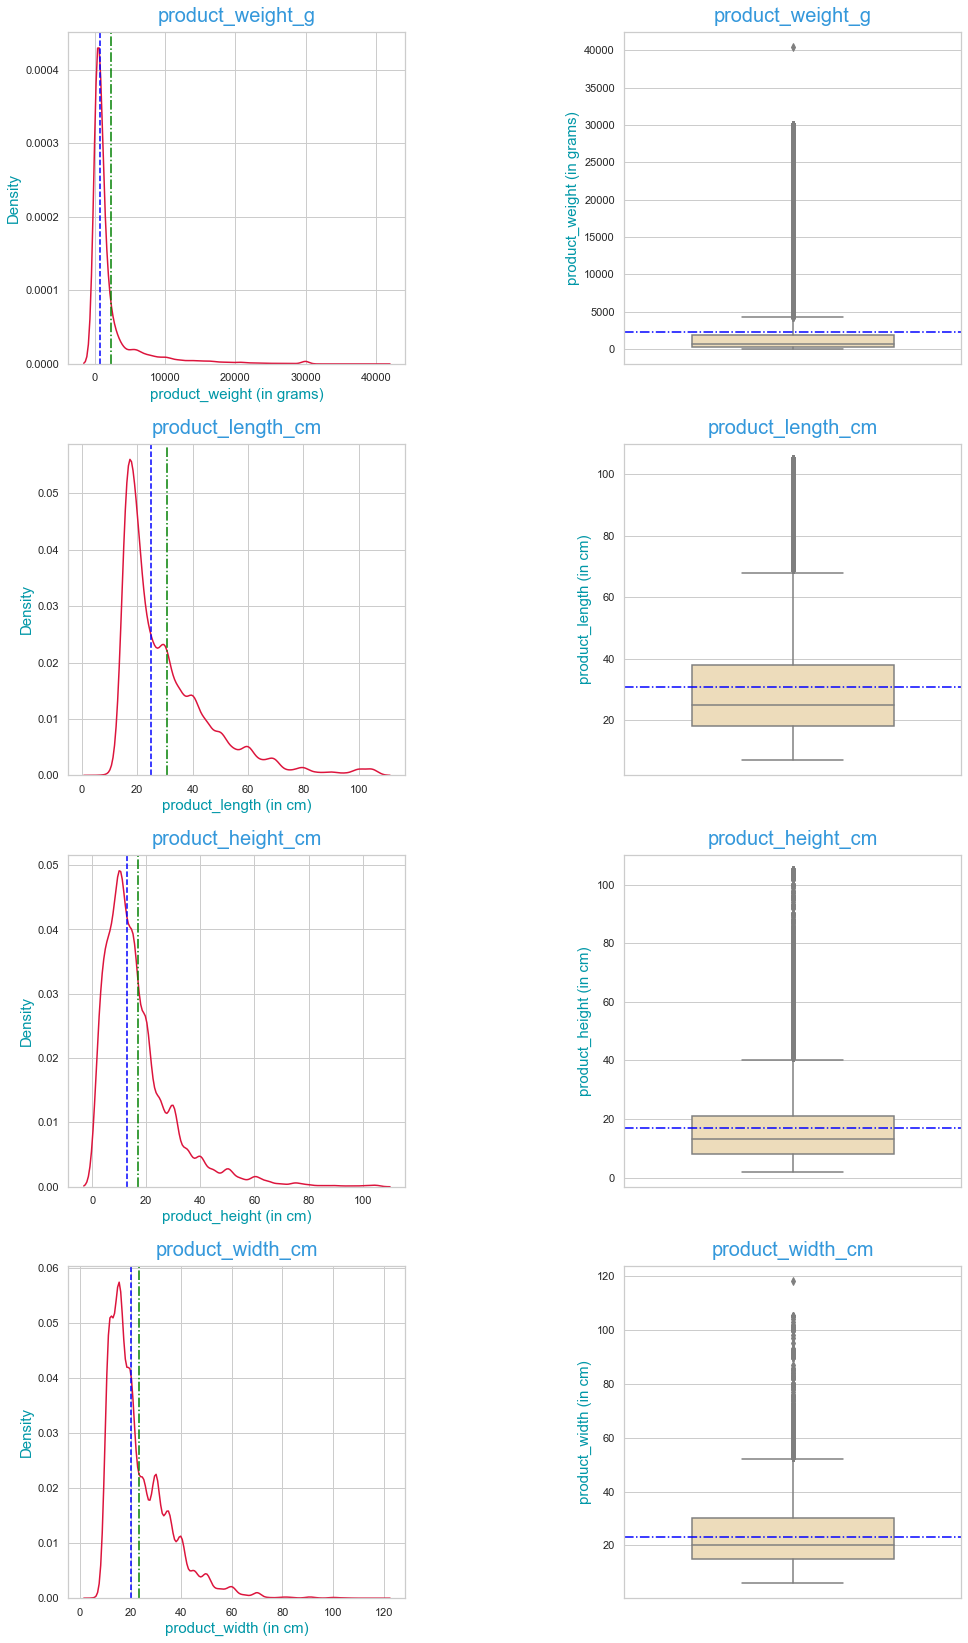

In [61]:
# Plotting the subplot of distplots and boxplots for all numerical variables in the dataset.

plt.figure(figsize=(16, 30)) 
plt.subplots_adjust(top=0.85, wspace= 0.65, hspace= 0.24)  ## setting the width of the padding between subplots

colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters


# Distplot for the 'product_weight_g' column.
plt.subplot(4,2,1)
sns.distplot(products.product_weight_g, color= 'Crimson', kde=True, hist=False) # Plotting distplot
plt.axvline(products.product_weight_g.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(products.product_weight_g.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_weight_g' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_weight (in grams)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_weight_g' column.
plt.subplot(4,2,2)
sns.boxplot(y = 'product_weight_g', data = products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(products.product_weight_g.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_weight_g' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_weight (in grams)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'product_length_cm' column.
plt.subplot(4,2,3)
sns.distplot(products.product_length_cm, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(products.product_length_cm.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(products.product_length_cm.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_length_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_length (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_length_cm' column.
plt.subplot(4,2,4)
sns.boxplot(y = 'product_length_cm', data = products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(products.product_length_cm.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_length_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_length (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'product_height_cm' column.
plt.subplot(4,2,5)
sns.distplot(products.product_height_cm, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(products.product_height_cm.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(products.product_height_cm.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_height_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_height (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_height_cm' column.
plt.subplot(4,2,6)
sns.boxplot(y = 'product_height_cm', data = products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(products.product_height_cm.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_height_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_height (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'product_width_cm' column.
plt.subplot(4,2,7)
sns.distplot(products.product_width_cm, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(products.product_width_cm.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(products.product_width_cm.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_width_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_width (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_width_cm' column.
plt.subplot(4,2,8)
sns.boxplot(y = 'product_width_cm', data = products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(products.product_width_cm.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_width_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_width (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> In all of the above attributes, we can observe that data is highly skewed towards positive side which indicates that we have outliers on the higher side.

#  <font color="#2980B9"> Task 3: Preparing Data

- ### <font color="IndianRed"> Subtask 3.1: Cleaning, Imputing and Dropping values from dataframe

- #### <font color="IndianRed"> Subtask 3.1.1: orders

In [62]:
# Checking duplicates in 'order_id'
orders['order_id'].duplicated().sum()

# 0 duplicated in order_id.

0

In [63]:
# Checking duplicates in 'order_id'
orders['customer_id'].duplicated().sum()

# 3345 duplicated in customer_id.

3345

In [64]:
delivered_orders = orders[orders['order_status']== 'delivered']
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [65]:
delivered_orders['order_status'].value_counts()

delivered    96478
Name: order_status, dtype: int64

In [66]:
# Checking the total number of null values in the delivered_orders dataframe
missing_data(delivered_orders)

,Total,Percent,Types
order_approved_at,14,0.01,datetime64[ns]
order_delivered_timestamp,8,0.01,datetime64[ns]
order_id,0,0.00,object
customer_id,0,0.00,object
order_status,0,0.00,object
order_purchase_timestamp,0,0.00,datetime64[ns]
order_estimated_delivery_date,0,0.00,datetime64[ns]


In [67]:
# Logically, order_purchase_timestamp cannot be greater than order_approved_at
((delivered_orders['order_purchase_timestamp'] <= delivered_orders['order_approved_at']) == False).sum()

# There are 14 order_purchase_timestamp which is greater than order_approved_at which is impossible as no order cannot be approved prior to the purchase.

14

In [68]:
false_1 = delivered_orders[(delivered_orders['order_purchase_timestamp'] <= delivered_orders['order_approved_at']) == False]
false_1[['order_purchase_timestamp','order_approved_at']]

,order_purchase_timestamp,order_approved_at
5323,2017-02-18 14:40:00,NaT
16567,2017-02-18 12:45:31,NaT
19031,2017-02-18 13:29:47,NaT
22663,2017-02-18 16:48:35,NaT
23156,2017-02-17 13:05:55,NaT
26800,2017-01-19 12:48:08,NaT
38290,2017-02-19 01:28:47,NaT
39334,2017-02-18 11:04:19,NaT
48401,2017-01-19 22:26:59,NaT
61743,2017-02-17 17:21:55,NaT


In [69]:
print(len(false_1))
false_1.index

14


Int64Index([5323, 16567, 19031, 22663, 23156, 26800, 38290, 39334, 48401, 61743, 63052, 67697, 72407, 84999], dtype='int64')

In [70]:
for index in delivered_orders.index:
    for fal_index in false_1.index:
        if  index == fal_index:
            delivered_orders['order_approved_at'].fillna(delivered_orders['order_purchase_timestamp'], inplace=True)

In [71]:
index = [5323,16567,19031,22663,23156,26800,38290,39334,48401,61743,63052,67697,72407,84999]
delivered_orders[delivered_orders.index==39334]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
39334,d77031d6a3c8a52f019764e68f211c69,c4c0011e639bdbcf26059ddc38bd3c18,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-03-02 16:15:23,2017-03-22


In [72]:
# Logically, order_purchase_timestamp cannot be greater than order_delivered_timestamp
((delivered_orders['order_purchase_timestamp'] < delivered_orders['order_delivered_timestamp']) == False).sum()

# There are 8 order_purchase_timestamp which is greater than order_approved_at which is impossible as no order cannot be delivered prior to the purchase.

8

In [73]:
false_2 = delivered_orders[(delivered_orders['order_purchase_timestamp'] < delivered_orders['order_delivered_timestamp']) == False]
false_2[['order_purchase_timestamp','order_delivered_timestamp']]

,order_purchase_timestamp,order_delivered_timestamp
3002,2017-11-28 17:44:07,NaT
20618,2018-06-20 06:58:43,NaT
43834,2018-07-01 17:05:11,NaT
79263,2018-07-01 22:05:55,NaT
82868,2018-07-01 21:14:02,NaT
92643,2017-05-25 23:22:43,NaT
97647,2018-06-08 12:09:39,NaT
98038,2018-06-27 16:09:12,NaT


In [74]:
print(len(false_2))
false_2.index

8


Int64Index([3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038], dtype='int64')

In [75]:
delivered_orders.drop(false_2.index,axis = 0, inplace=True)

In [76]:
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [77]:
delivered_orders[delivered_orders.index==20618]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [78]:
# Logically, order_purchase_timestamp cannot be greater than order_estimated_delivery_date
((delivered_orders['order_purchase_timestamp'] < delivered_orders['order_estimated_delivery_date']) == False).sum()

# There are no order_purchase_timestamp which is greater than order_estimated_delivery_date.

0

In [79]:
# Logically, order_approved_at cannot be greater than order_delivered_timestamp
((delivered_orders['order_approved_at'] < delivered_orders['order_delivered_timestamp']) == False).sum()

# There are 83 order_purchase_timestamp which are greater than order_delivered_timestamp which is impossible as no order cannot be delivered prior to its approval by the seller.

61

In [80]:
false_3 = delivered_orders[(delivered_orders['order_approved_at'] < delivered_orders['order_delivered_timestamp']) == False]
false_3[['order_approved_at','order_delivered_timestamp']]

,order_approved_at,order_delivered_timestamp
199,2018-07-26 23:31:53,2018-07-25 23:58:19
483,2018-07-29 23:30:52,2018-07-27 18:55:57
1986,2018-08-20 15:55:42,2018-08-17 16:45:45
3659,2018-02-04 23:31:47,2018-02-01 20:10:38
11738,2017-09-13 22:04:39,2017-09-11 14:15:02
13470,2018-07-28 23:31:06,2018-07-26 17:03:43
14562,2017-09-13 22:06:11,2017-09-08 20:13:03
16345,2018-07-27 23:30:58,2018-07-25 18:21:18
18097,2018-07-05 16:40:30,2018-07-04 22:42:41
20557,2018-07-05 16:25:45,2018-07-05 12:58:37


In [81]:
print(len(false_3))
false_3.index

61


Int64Index([199, 483, 1986, 3659, 11738, 13470, 14562, 16345, 18097, 20557, 24212, 24823, 25383, 25411, 27309, 27411, 27804, 28593, 31211, 35063, 36611, 37032, 38031, 39360, 40421, 41592, 43418, 46163, 46262, 48438, 48469, 50623, 52675, 57637, 61544, 64231, 64496, 65185, 66337, 66460, 68134, 68417, 71860, 73985, 74187, 74471, 75631, 76333, 81925, 85393, 86230, 86522, 86729, 87076, 88063, 89581, 89703, 91801, 93680, 94359, 98359], dtype='int64')

In [82]:
delivered_orders.drop(false_3.index,axis = 0, inplace=True)
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [83]:
delivered_orders[delivered_orders.index==64496]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [84]:
# Logically, order_approved_at cannot be greater than order_estimated_delivery_date
((delivered_orders['order_approved_at'] < delivered_orders['order_estimated_delivery_date']) == False).sum()

# There are 20 order_approved_at that are greater than order_estimated_delivery_date which 
# is impossible as no order cannot be can get an estimated delivery time prior to its approval by the seller.

1

In [85]:
false_4 = delivered_orders[(delivered_orders['order_approved_at'] < delivered_orders['order_estimated_delivery_date']) == False]
false_4[['order_approved_at','order_estimated_delivery_date']]

,order_approved_at,order_estimated_delivery_date
55353,2018-08-24 22:05:08,2018-08-23


In [86]:
print(len(false_4))
false_4.index

1


Int64Index([55353], dtype='int64')

In [87]:
delivered_orders.drop(false_4.index,axis = 0, inplace=True)
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [88]:
delivered_orders[delivered_orders.index==55353]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [89]:
# Logically, order_delivered_timestamp cannot be greater than order_estimated_delivery_date
((delivered_orders['order_delivered_timestamp'] <= delivered_orders['order_estimated_delivery_date']) == False).sum()

# There are 7834 order_delivered_timestamp that are greater than order_estimated_delivery_date which 
# means that these many orders delivered late.
## As per instructions, we have to work with all the delivered orders, so we can ignore this check and consider these orders in our project.

7823

In [90]:
# As we have to work with all the delivered orders, 
# so we can drop the 'order_status' column as it only contains unary value i.e. 'delivered'.
delivered_orders.drop(columns='order_status',axis = 1, inplace=True)
delivered_orders.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [91]:
# Checking the total number of null values in the delivered_orders dataframe
missing_data(delivered_orders)

,Total,Percent,Types
order_id,0,0.0,object
customer_id,0,0.0,object
order_purchase_timestamp,0,0.0,datetime64[ns]
order_approved_at,0,0.0,datetime64[ns]
order_delivered_timestamp,0,0.0,datetime64[ns]
order_estimated_delivery_date,0,0.0,datetime64[ns]


In [92]:
# Shape of cleaned data
delivered_orders.shape

(96408, 6)

- #### <font color="IndianRed"> Subtask 3.1.2: order_items

In [93]:
# Dropping order_item_id 
order_items.drop(columns='order_item_id',axis = 1, inplace=True)
order_items.head()

,order_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [94]:
# Creating a new dataframe for total amount and total shipping charges for an order.
order_items_summary = order_items.groupby(by=['order_id']).sum()
order_items_summary= order_items_summary.reset_index()
order_items_summary.columns=['order_id', 'total_amount', 'total_shipping_charges']
order_items_summary

,order_id,total_amount,total_shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [95]:
# Quantity of items per order_id
total_quantity = order_items[['order_id']].value_counts()
total_quantity.to_frame(name='order_id')
total_quantity = total_quantity.reset_index()
total_quantity.columns=['order_id', 'total_items_per_order']
total_quantity

,order_id,total_items_per_order
0,8272b63d03f5f79c56e9e4120aec44ef,21
1,1b15974a0141d54e36626dca3fdc731a,20
2,ab14fdcfbe524636d65ee38360e22ce8,20
3,9ef13efd6949e4573a18964dd1bbe7f5,15
4,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
98661,5a0911d70c1f85d3bed0df1bf693a6dd,1
98662,5a082b558a3798d3e36d93bfa8ca1eae,1
98663,5a07264682e0b8fbb3f166edbbffc6e8,1
98664,5a071192a28951b76774e5a760c8c9b7,1


In [96]:
# Merging total_quantity dataframe to order_items_summary and saving them into a new dataframe 'order_items_summary_df'.
order_items_summary_df = total_quantity.merge(order_items_summary,on='order_id',how='inner')
order_items_summary_df

,order_id,total_items_per_order,total_amount,total_shipping_charges
0,8272b63d03f5f79c56e9e4120aec44ef,21,31.80,164.37
1,1b15974a0141d54e36626dca3fdc731a,20,2000.00,202.40
2,ab14fdcfbe524636d65ee38360e22ce8,20,1974.00,288.80
3,9ef13efd6949e4573a18964dd1bbe7f5,15,765.00,18.00
4,428a2f660dc84138d969ccd69a0ab6d5,15,982.35,243.30
...,...,...,...,...
98661,5a0911d70c1f85d3bed0df1bf693a6dd,1,59.00,51.13
98662,5a082b558a3798d3e36d93bfa8ca1eae,1,9.00,15.23
98663,5a07264682e0b8fbb3f166edbbffc6e8,1,19.90,19.32
98664,5a071192a28951b76774e5a760c8c9b7,1,899.00,106.43


In [97]:
# Creating a new dataframe for net amount and net shipping charges for an order.
order_items_group = order_items.groupby(by=['order_id','product_id','seller_id']).sum()
order_items_group=order_items_group.reset_index()
order_items_group.columns=['order_id', 'product_id', 'seller_id','net_amount', 'net_shipping_charges']
order_items_group

,order_id,product_id,seller_id,net_amount,net_shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [98]:
# item quantity per order
quantity = order_items[['order_id','product_id','seller_id']].value_counts()
quantity.to_frame(name='order_id')
quantity = quantity.reset_index()
quantity.columns=['order_id', 'product_id', 'seller_id', 'item_quantity_per_order']
quantity

,order_id,product_id,seller_id,item_quantity_per_order
0,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,20
1,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,20
2,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,15
3,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,15
4,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,14
...,...,...,...,...
102420,5897449bce69856d88610b3c0f4f63b5,b0364648b1c062169015d9234d97d306,4da0e408c99d2fdc2126dc9fce518060,1
102421,5896d753079d9faa8aeaf60231b3e788,cce679660c66e6fbd5c8091dfd29e9cd,d2374cbcbb3ca4ab1086534108cc3ab7,1
102422,589673b4d98b5c40931ac6a6ff6f3416,fe01b643060a6446e59f58e3021e66b3,2dee2ce60de9709b1a24083217181a1f,1
102423,5895d82d31799f8d7ad6748c25e76dad,24c66f106f642621e524291a895c9032,620c87c171fb2a6dd6e8bb4dec959fc6,1


In [99]:
order_items_group_df = quantity.merge(order_items_group,on=['order_id','product_id','seller_id'],how='inner')
order_items_group_df

,order_id,product_id,seller_id,item_quantity_per_order,net_amount,net_shipping_charges
0,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,20,2000.00,202.40
1,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,20,1974.00,288.80
2,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,15,982.35,243.30
3,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,15,765.00,18.00
4,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,14,826.00,188.02
...,...,...,...,...,...,...
102420,5897449bce69856d88610b3c0f4f63b5,b0364648b1c062169015d9234d97d306,4da0e408c99d2fdc2126dc9fce518060,1,183.90,15.46
102421,5896d753079d9faa8aeaf60231b3e788,cce679660c66e6fbd5c8091dfd29e9cd,d2374cbcbb3ca4ab1086534108cc3ab7,1,17.90,15.10
102422,589673b4d98b5c40931ac6a6ff6f3416,fe01b643060a6446e59f58e3021e66b3,2dee2ce60de9709b1a24083217181a1f,1,169.00,57.95
102423,5895d82d31799f8d7ad6748c25e76dad,24c66f106f642621e524291a895c9032,620c87c171fb2a6dd6e8bb4dec959fc6,1,199.90,16.10


In [100]:
order_items_group_df['unit_price'] = order_items_group_df['net_amount'] / order_items_group_df['item_quantity_per_order']

order_items_group_df['unit_shipping_charges'] = order_items_group_df['net_shipping_charges'] / order_items_group_df['item_quantity_per_order']

# Moving column
fourth_column = order_items_group_df.pop('unit_price')
order_items_group_df.insert(3, 'unit_price', fourth_column)

fifth_column = order_items_group_df.pop('unit_shipping_charges')
order_items_group_df.insert(4, 'unit_shipping_charges', fifth_column)

order_items_group_df

,order_id,product_id,seller_id,unit_price,unit_shipping_charges,item_quantity_per_order,net_amount,net_shipping_charges
0,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.00,10.12,20,2000.00,202.40
1,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,98.70,14.44,20,1974.00,288.80
2,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,65.49,16.22,15,982.35,243.30
3,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,51.00,1.20,15,765.00,18.00
4,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,59.00,13.43,14,826.00,188.02
...,...,...,...,...,...,...,...,...
102420,5897449bce69856d88610b3c0f4f63b5,b0364648b1c062169015d9234d97d306,4da0e408c99d2fdc2126dc9fce518060,183.90,15.46,1,183.90,15.46
102421,5896d753079d9faa8aeaf60231b3e788,cce679660c66e6fbd5c8091dfd29e9cd,d2374cbcbb3ca4ab1086534108cc3ab7,17.90,15.10,1,17.90,15.10
102422,589673b4d98b5c40931ac6a6ff6f3416,fe01b643060a6446e59f58e3021e66b3,2dee2ce60de9709b1a24083217181a1f,169.00,57.95,1,169.00,57.95
102423,5895d82d31799f8d7ad6748c25e76dad,24c66f106f642621e524291a895c9032,620c87c171fb2a6dd6e8bb4dec959fc6,199.90,16.10,1,199.90,16.10


In [101]:
products_stats_group=order_items.groupby(by='product_id').agg(['count','mean','median','sum'])
products_stats_group=products_stats_group.reset_index()
products_stats_group

product_id price                         shipping_charges                       
                                        count    mean  median     sum            count    mean  median    sum
0      00066f42aeeb9f3007548bb9d3f33c38     1  101.65  101.65  101.65                1  18.590  18.590  18.59
1      00088930e925c41fd95ebfe695fd2655     1  129.90  129.90  129.90                1  13.930  13.930  13.93
2      0009406fd7479715e4bef61dd91f2462     1  229.00  229.00  229.00                1  13.100  13.100  13.10
3      000b8f95fcb9e0096488278317764d19     2   58.90   58.90  117.80                2  19.600  19.600  39.20
4      000d9be29b5207b54e86aa1b1ac54872     1  199.00  199.00  199.00                1  19.270  19.270  19.27
...                                 ...   ...     ...     ...     ...              ...     ...     ...    ...
32946  fff6177642830a9a94a0f2cba5e476d1     2  114.99  114.99  229.98                2  27.705  27.705  55.41
32947  fff81cc3158d2725c0655ab9ba0f712c     1   90.00   90.00   90.00                1   7.890   7.890   7.89
32948  fff9553ac224cec9d15d49f5a263411f     1   32.00   32.00   32.00                1  11.850  11.850  11.85
32949  fffdb2d0ec8d6a61f0a0a0db3f25b441     5   33.99   34.99  169.95                5  11.774   7.510  58.87
32950  fffe9eeff12fcbd74a2f2b007dde0c58     1  249.99  249.99  249.99                1  53.880  53.880  53.88

[32951 rows x 9 columns]

In [102]:
products_stats_group.columns

MultiIndex([(      'product_id',       ''),
            (           'price',  'count'),
            (           'price',   'mean'),
            (           'price', 'median'),
            (           'price',    'sum'),
            ('shipping_charges',  'count'),
            ('shipping_charges',   'mean'),
            ('shipping_charges', 'median'),
            ('shipping_charges',    'sum')],
           )

In [103]:
products_stats_group.columns=products_stats_group.columns.map('_'.join)
products_stats_group.drop(columns='shipping_charges_count',axis = 1, inplace=True)
products_stats_group.columns=['product_id', 'count', 'price_mean', 'price_median', 'price_sum', 'shipping_charges_mean', 'shipping_charges_median', 'shipping_charges_sum']
products_stats_group

,product_id,count,price_mean,price_median,price_sum,shipping_charges_mean,shipping_charges_median,shipping_charges_sum
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,101.65,101.65,18.590,18.590,18.59
1,00088930e925c41fd95ebfe695fd2655,1,129.90,129.90,129.90,13.930,13.930,13.93
2,0009406fd7479715e4bef61dd91f2462,1,229.00,229.00,229.00,13.100,13.100,13.10
3,000b8f95fcb9e0096488278317764d19,2,58.90,58.90,117.80,19.600,19.600,39.20
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,199.00,199.00,19.270,19.270,19.27
...,...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,114.99,114.99,229.98,27.705,27.705,55.41
32947,fff81cc3158d2725c0655ab9ba0f712c,1,90.00,90.00,90.00,7.890,7.890,7.89
32948,fff9553ac224cec9d15d49f5a263411f,1,32.00,32.00,32.00,11.850,11.850,11.85
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,33.99,34.99,169.95,11.774,7.510,58.87


- #### <font color="IndianRed"> Subtask 3.1.3: customers

In [104]:
customers['customer_id'].count()

99441

In [105]:
# number of duplicates in customer_id column
customers['customer_id'].duplicated().sum()   # 99441-3345

3345

In [106]:
customers[customers['customer_id'].duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [107]:
# Taking unique customer_id's after removing duplicates
customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)
customers.shape

(96096, 4)

In [108]:
# Checking duplicates
customers['customer_id'].duplicated().sum()

## No duplicates in customer_id

0

In [109]:
customers.nunique()

customer_id                 96096
customer_zip_code_prefix    14982
customer_city                4118
customer_state                 27
dtype: int64

- #### <font color="IndianRed"> Subtask 3.1.4: payments

In [110]:
payments['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [111]:
# Dropping payment_sequential 
payments.drop(columns='payment_sequential',axis = 1, inplace=True)
payments.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [112]:
payments_summary = payments.groupby(by=['order_id','payment_type']).sum()
payments_summary= payments_summary.reset_index()
payments_summary.drop(columns='payment_installments',axis = 1, inplace=True)
payments_summary

,order_id,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04
...,...,...,...
101681,fffc94f6ce00a00581880bf54a75a037,wallet,343.40
101682,fffcd46ef2263f404302a634eb57f7eb,wallet,386.53
101683,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85
101684,fffe18544ffabc95dfada21779c9644f,credit_card,64.71


In [113]:
payments_summary.shape

(101686, 3)

In [114]:
Value_Count(payments_summary)

order_id                                   Total  Percent
d6e320ab3eb91f810c2a3296998bdcc8      2      0.0
092ae7e7141e3d69ecd0935d97e14fd9      2      0.0
d6f83d3377bbf1697831ea355301fb87      2      0.0
c78b50d1c5ddfed2a5394dd0e90c4e99      2      0.0
67e7cace5deab160cedd95c80e6f60a8      2      0.0
...                                 ...      ...
564e414f20390e6417f5e6c6ad3f095e      1      0.0
564db6e83379512127bc60da803b4a36      1      0.0
564d8bd235927df0c8c8bfe8ff4aee6d      1      0.0
564d27104ae4e2c4d3592769b928fee6      1      0.0
fffe41c64501cc87c801fd61db3f6244      1      0.0

[99440 rows x 2 columns] 


payment_type              Total  Percent
credit_card  76505    75.24
wallet       19784    19.46
voucher       3866     3.80
debit_card    1528     1.50
not_defined      3     0.00 




- #### <font color="IndianRed"> Subtask 3.1.5: products

In [115]:
# Checking duplicates in product_id
products['product_id'].duplicated().sum()

0

In [116]:
products['product_category_name'].mode()[0]

'toys'

In [117]:
# Filling the null values with mode
products['product_category_name'].fillna(products['product_category_name'].mode()[0], inplace=True)

In [118]:
num_cols = products.describe().columns.to_list()
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [119]:
for i in num_cols:
    products[i].fillna(products[i].median(), inplace=True)

In [120]:
# Creating product_volume_in_cubic_cm column in product table
products['product_volume_in_cubic_cm'] = products['product_length_cm']*products['product_width_cm']*products['product_height_cm']

In [121]:
missing_data(products)

,Total,Percent,Types
product_id,0,0.0,object
product_category_name,0,0.0,object
product_weight_g,0,0.0,float64
product_length_cm,0,0.0,float64
product_height_cm,0,0.0,float64
product_width_cm,0,0.0,float64
product_volume_in_cubic_cm,0,0.0,float64


#  <font color="#2980B9"> Task 4: Merging the Dataframes

In [122]:
# Merging delivered_orders and order_items_summary dataframe.
order_df = delivered_orders.merge(order_items_summary_df,on='order_id', how='inner').merge(customers,on='customer_id',how='inner')
order_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,total_items_per_order,total_amount,total_shipping_charges,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,3149,sao paulo,SP
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,35.39,8.72,3149,sao paulo,SP
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,47813,barreiras,BA
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,75265,vianopolis,GO
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,59296,sao goncalo do amarante,RN


In [123]:
# Checking shape of order_df
order_df.shape

(96408, 12)

In [124]:
# Checking missing values in order_df
missing_data(order_df)

,Total,Percent,Types
order_id,0,0.0,object
customer_id,0,0.0,object
order_purchase_timestamp,0,0.0,datetime64[ns]
order_approved_at,0,0.0,datetime64[ns]
order_delivered_timestamp,0,0.0,datetime64[ns]
order_estimated_delivery_date,0,0.0,datetime64[ns]
total_items_per_order,0,0.0,int64
total_amount,0,0.0,float64
total_shipping_charges,0,0.0,float64
customer_zip_code_prefix,0,0.0,int64


In [125]:
# Merging order_items_group_df and products dataframe.
order_items_products_df = order_items_group_df.merge(products,on='product_id', how='inner').merge(payments_summary,on='order_id',how='inner')
order_items_products_df.head()

,order_id,product_id,seller_id,unit_price,unit_shipping_charges,item_quantity_per_order,net_amount,net_shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_in_cubic_cm,payment_type,payment_value
0,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,20,2000.0,202.40,toys,360.0,19.0,18.0,15.0,5130.0,wallet,2202.40
1,7b0c4136f285a86a8ceed54be6f56641,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,12.83,2,200.0,25.66,toys,360.0,19.0,18.0,15.0,5130.0,wallet,225.66
2,ca376f8f4042e61688af8cfd32d4e80e,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,99.9,17.14,2,199.8,34.28,toys,360.0,19.0,18.0,15.0,5130.0,credit_card,234.08
3,9561fdb9089a36bb1e9c58c334053eda,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,15.45,2,200.0,30.90,toys,360.0,19.0,18.0,15.0,5130.0,wallet,230.90
4,8a7aac96934b61b070e94762ca857e31,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,12.83,2,200.0,25.66,toys,360.0,19.0,18.0,15.0,5130.0,wallet,225.66


In [126]:
# Checking shape of order_items_products_df
order_items_products_df.shape

(104745, 16)

In [127]:
# Checking missing values in order_items_products_df
missing_data(order_items_products_df)

,Total,Percent,Types
order_id,0,0.0,object
product_id,0,0.0,object
seller_id,0,0.0,object
unit_price,0,0.0,float64
unit_shipping_charges,0,0.0,float64
item_quantity_per_order,0,0.0,int64
net_amount,0,0.0,float64
net_shipping_charges,0,0.0,float64
product_category_name,0,0.0,object
product_weight_g,0,0.0,float64


In [128]:
# Merging products and products_stats_group dataframe.
prod_stats_df = products.merge(products_stats_group,on='product_id', how='inner')
prod_stats_df.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_in_cubic_cm,count,price_mean,price_median,price_sum,shipping_charges_mean,shipping_charges_median,shipping_charges_sum
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0,2240.0,1,10.91,10.91,10.91,7.39,7.39,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0,10800.0,1,248.00,248.00,248.00,17.99,17.99,17.99
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0,2430.0,1,79.80,79.80,79.80,7.82,7.82,7.82
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0,2704.0,1,112.30,112.30,112.30,9.54,9.54,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0,4420.0,1,37.90,37.90,37.90,8.29,8.29,8.29


In [129]:
# Checking shape of prod_stats_df
prod_stats_df.shape

(32951, 14)

In [130]:
# Checking missing values in prod_stats_df
missing_data(prod_stats_df)

,Total,Percent,Types
product_id,0,0.0,object
product_category_name,0,0.0,object
product_weight_g,0,0.0,float64
product_length_cm,0,0.0,float64
product_height_cm,0,0.0,float64
product_width_cm,0,0.0,float64
product_volume_in_cubic_cm,0,0.0,float64
count,0,0.0,int64
price_mean,0,0.0,float64
price_median,0,0.0,float64


In [131]:
# Merging order_df and order_items_products_df dataframe.
complete_merged_df = order_df.merge(order_items_products_df,on='order_id', how='inner')
complete_merged_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,total_items_per_order,total_amount,total_shipping_charges,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,unit_price,unit_shipping_charges,item_quantity_per_order,net_amount,net_shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_in_cubic_cm,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1,29.99,8.72,housewares,500.0,19.0,8.0,13.0,1976.0,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1,29.99,8.72,housewares,500.0,19.0,8.0,13.0,1976.0,voucher,20.59
2,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,35.39,8.72,3149,sao paulo,SP,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,1,35.39,8.72,baby,350.0,19.0,14.0,12.0,3192.0,credit_card,44.11
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1,118.70,22.76,toys,400.0,19.0,13.0,19.0,4693.0,wallet,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1,159.90,19.22,toys,420.0,24.0,19.0,21.0,9576.0,credit_card,179.12


In [132]:
# Checking shape of merged_df
complete_merged_df.shape

(102397, 27)

In [133]:
# Checking missing values in merged_df
missing_data(complete_merged_df)

,Total,Percent,Types
order_id,0,0.0,object
unit_price,0,0.0,float64
payment_type,0,0.0,object
product_volume_in_cubic_cm,0,0.0,float64
product_width_cm,0,0.0,float64
product_height_cm,0,0.0,float64
product_length_cm,0,0.0,float64
product_weight_g,0,0.0,float64
product_category_name,0,0.0,object
net_shipping_charges,0,0.0,float64


# <font color="#2980B9"> Task 5: Exploratory Data Analysis

In [134]:
## User defined function to plot bar plot.

def bar_plot(fig_X, fig_Y, data_X, data_Y,data,Title_1, X_Label, Y_Label, X_Ticks_Rotation):
    
    plt.figure(figsize = (fig_X, fig_Y))  ## Setting figure size
    colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
    pal = sns.color_palette(colors,10,1)
    sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters
    
    ## Code for bar plot
    ax = sns.barplot(x = data_X, y=data_Y, data = data)  ## Code to plot Countplot in Seaborn
    
    plt.title(Title_1 , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
    plt.xlabel(X_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
    plt.ylabel(Y_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
    plt.xticks(rotation = X_Ticks_Rotation)  # Set text labels and properties.
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    
    plt.show()
    return

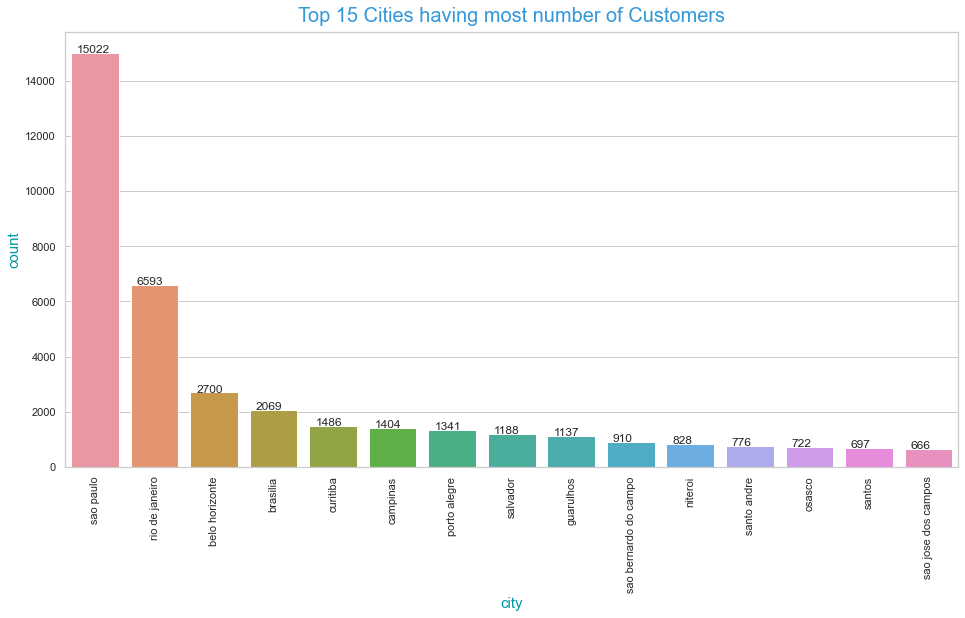

In [135]:
# Checking how many items most of the customers purchase 
city_df=pd.DataFrame(order_df['customer_city'].value_counts())
city_df=city_df.reset_index()
city_df.columns=['city','number_of_customers']
city_df.sort_values(by='number_of_customers', ascending=False).head(15)

bar_plot(16,8, city_df['city'].head(15),city_df['number_of_customers'].head(15) ,
         city_df, 'Top 15 Cities having most number of Customers','city','count', 90) # Plotting barplot

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> OList has gotten its __15022__ (15.63%) of orders the city of Sao Paulo followed by Rio de Janeiro city with total of __6593__ (6.92%) over the course of 2 years.

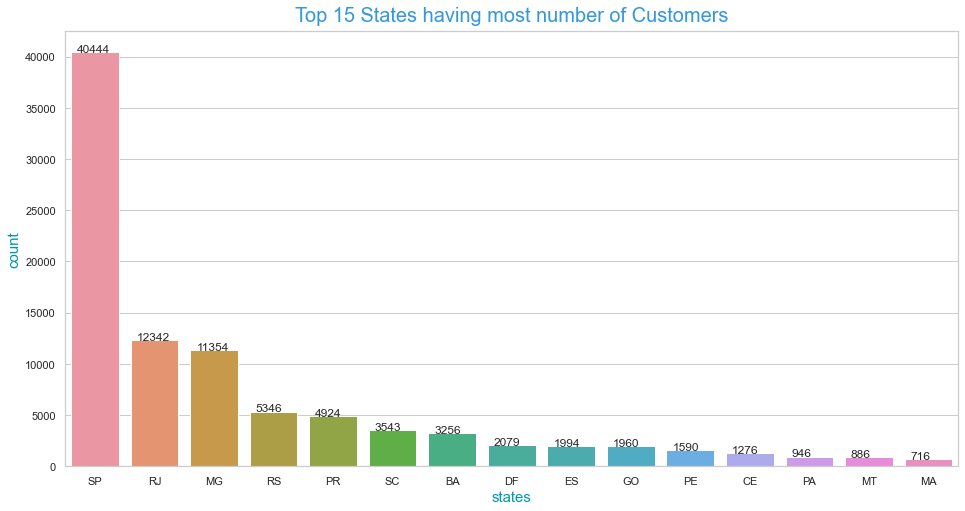

In [136]:
# Checking how many items most of the customers purchase 
state_df=pd.DataFrame(order_df['customer_state'].value_counts())
state_df=state_df.reset_index()
state_df.columns=['state','number_of_customers']
state_df.sort_values(by='number_of_customers', ascending=False).head(15)
bar_plot(16,8, state_df['state'].head(15),state_df['number_of_customers'].head(15) ,
         state_df, 'Top 15 States having most number of Customers','states','count', 0)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Of 27 states, Olist has gotten maximum business in Sao Paulo (SP) state with __40444__ orders i.e. 41.98% followed by State of Rio de Janeiro (RJ) with __12342__ customers and Minas Gerais (MG) with __11354__ which almost equals to 12.92% and 11.70% respectively over the course of 2 years.

In [137]:
## User defined function to plot count plot.

def bar_plot_new(fig_X, fig_Y, data_X, data_Y,data,Title_1, X_Label, Y_Label, X_Ticks_Rotation):
    
    plt.figure(figsize = (fig_X, fig_Y))  ## Setting figure size
    colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
    pal = sns.color_palette(colors,10,1)
    sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters
    
    ## Code for first plot
    ax = sns.barplot(x = data_X, y=data_Y, data = data)  ## Code to plot Countplot in Seaborn
    
    plt.title(Title_1 , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
    plt.xlabel(X_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
    plt.ylabel(Y_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
    plt.xticks(rotation = X_Ticks_Rotation)  # Set text labels and properties.
    
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    
    plt.show()
    return

In [138]:
# Pivot table on some numerical columns based on product categories by their mean.
pivot_tab = order_items_products_df.pivot_table(index=['product_category_name'],values=['net_shipping_charges','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','product_volume_in_cubic_cm'],aggfunc='mean')
pivot_tab=pivot_tab.reset_index()
pivot_tab

,product_category_name,net_shipping_charges,product_height_cm,product_length_cm,product_volume_in_cubic_cm,product_weight_g,product_width_cm
0,agro_industry_and_commerce,29.861695,24.203390,31.220339,23851.389831,3918.966102,21.237288
1,air_conditioning,30.575663,20.445783,35.397590,21642.409639,4582.638554,24.265060
2,art,20.658750,11.500000,39.562500,11546.125000,2765.625000,25.000000
3,arts_and_craftmanship,24.234000,9.600000,39.400000,11451.600000,1990.000000,31.200000
4,audio,15.018699,7.073171,22.430894,3586.723577,295.617886,16.390244
5,auto,23.098618,15.709213,34.039347,18410.312860,2455.999040,26.561420
6,baby,22.739121,20.406125,35.988016,28914.623169,3338.561917,29.621838
7,bed_bath_table,19.354114,12.307943,35.362933,14139.764969,1917.793483,29.058656
8,books_general_interest,19.711600,11.790000,23.170000,4627.150000,947.040000,18.440000
9,books_imported,14.281111,4.833333,31.055556,3072.666667,825.000000,21.444444


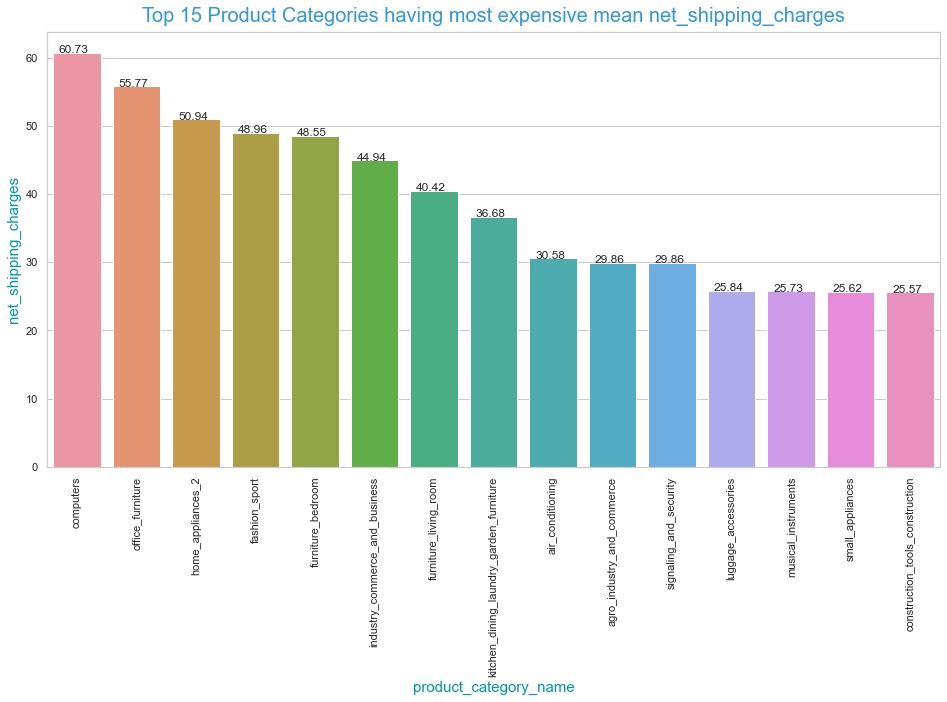

In [139]:
expensive_ship_charge=pivot_tab[['product_category_name','net_shipping_charges']].sort_values(by='net_shipping_charges',ascending=False).head(15)

# Top 15 Product Categories having most expensive mean net_shipping_charges 
bar_plot_new(16,8, expensive_ship_charge['product_category_name'],expensive_ship_charge['net_shipping_charges'] ,
         expensive_ship_charge, 'Top 15 Product Categories having most expensive mean net_shipping_charges','product_category_name','net_shipping_charges', 90)

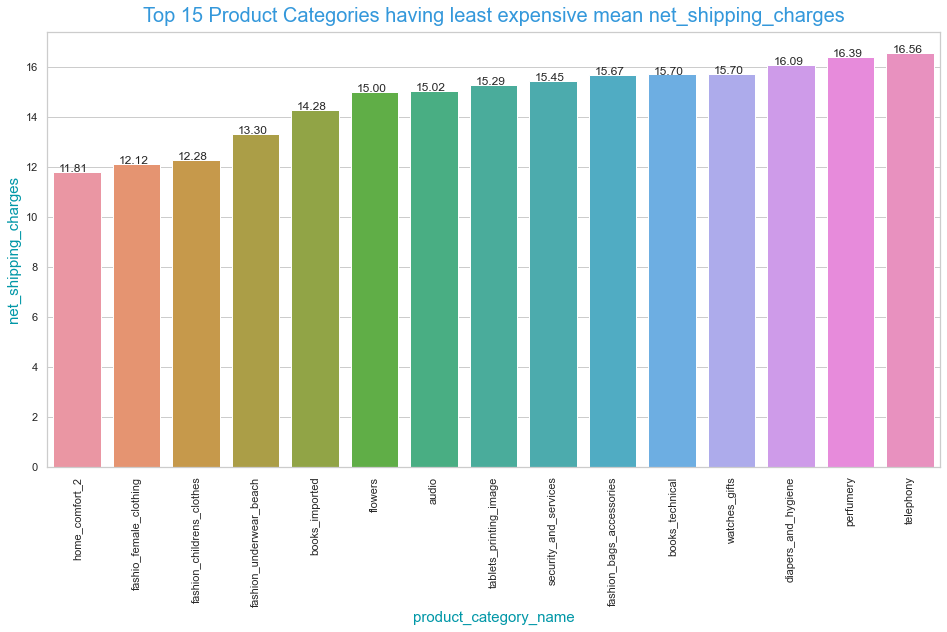

In [140]:
cheap_ship_charge=pivot_tab[['product_category_name','net_shipping_charges']].sort_values(by='net_shipping_charges',ascending=True).head(15)

# Top 15 Product Categories having most expensive mean net_shipping_charges 
bar_plot_new(16,8, cheap_ship_charge['product_category_name'],cheap_ship_charge['net_shipping_charges'] ,
         cheap_ship_charge, 'Top 15 Product Categories having least expensive mean net_shipping_charges','product_category_name','net_shipping_charges', 90)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Product categories like computers, office_furnitures, home_appliances_2, etc. has the highest mean shipping charges as they tend to be sometimes heavy, fragile or bulky in their size. 
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> The product categories which has least mean shipping charges are home_comfort_2, fashio_female_clothing, fashion_children_clothing, etc. as they may not be fragile, bulky in size or heavy.

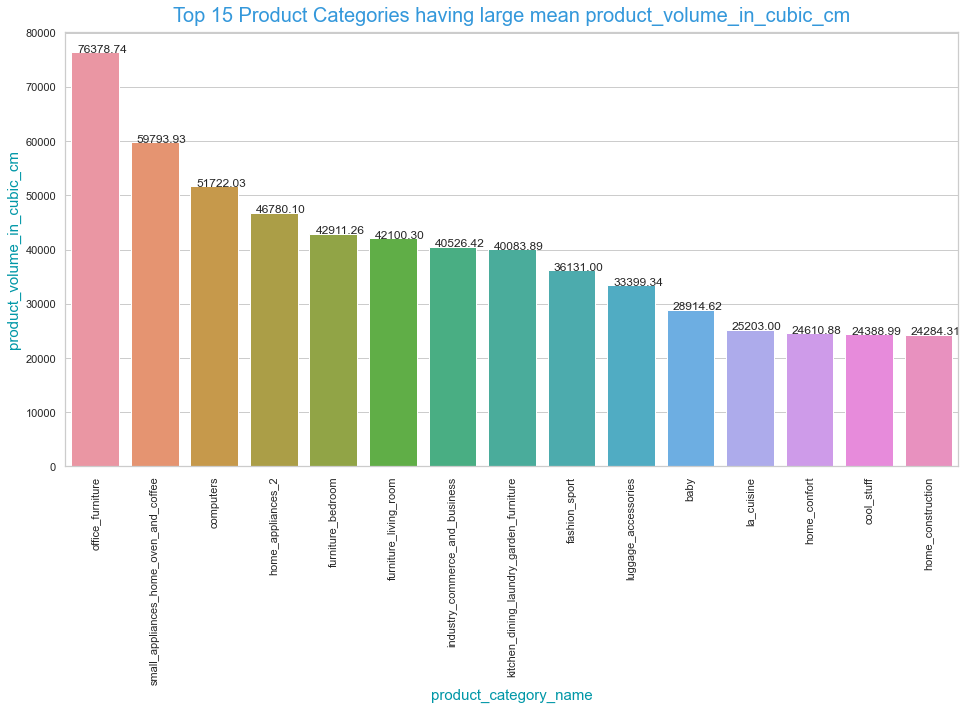

In [141]:
large_vol=pivot_tab[['product_category_name','product_volume_in_cubic_cm']].sort_values(by='product_volume_in_cubic_cm',ascending=False).head(15)

# Top 15 Product Categories having large mean product_volume_in_cubic_cm 
bar_plot_new(16,8, large_vol['product_category_name'],large_vol['product_volume_in_cubic_cm'] ,
         large_vol, 'Top 15 Product Categories having large mean product_volume_in_cubic_cm',
             'product_category_name','product_volume_in_cubic_cm', 90)

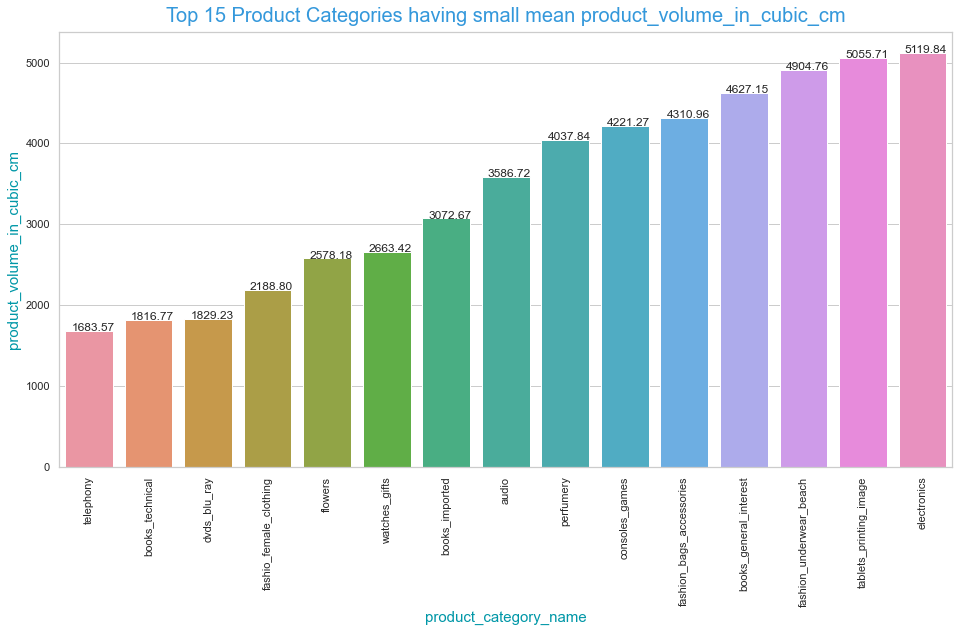

In [142]:
small_vol=pivot_tab[['product_category_name','product_volume_in_cubic_cm']].sort_values(by='product_volume_in_cubic_cm',ascending=True).head(15)

# Top 15 Product Categories having small mean product_volume_in_cubic_cm
bar_plot_new(16,8, small_vol['product_category_name'],small_vol['product_volume_in_cubic_cm'] ,
         small_vol, 'Top 15 Product Categories having small mean product_volume_in_cubic_cm',
             'product_category_name','product_volume_in_cubic_cm', 90)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Product categories like office_furnitures, small_appliances_home_oven_and_coffee, computers, home_appliances_2 etc. often conatians products which has high mean volume in cubic centimetres as they tend to be heavy and bulky in their size.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> The product categories which has least mean volume in cubic centimetres are telephony, books_technical, dvds_blu_ray, etc. as the products they contain may not be bulky in size or heavy.

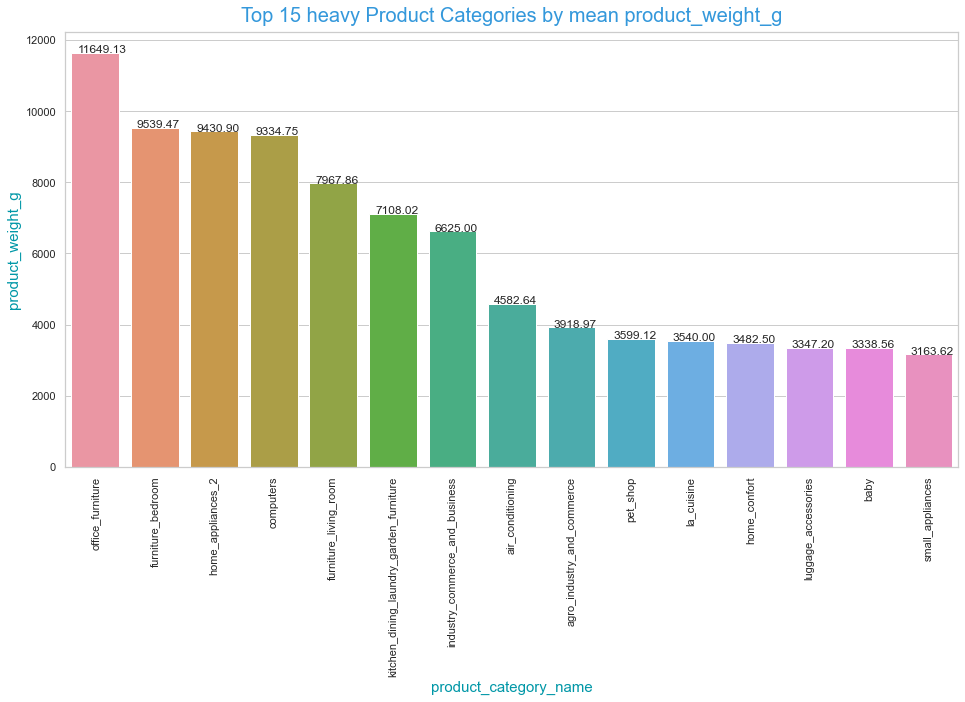

In [143]:
heavy=pivot_tab[['product_category_name','product_weight_g']].sort_values(by='product_weight_g',ascending=False).head(15)

# Top 15 heavy Product Categories by mean product_weight_g
bar_plot_new(16,8, heavy['product_category_name'],heavy['product_weight_g'] ,
         heavy, 'Top 15 heavy Product Categories by mean product_weight_g','product_category_name','product_weight_g', 90)

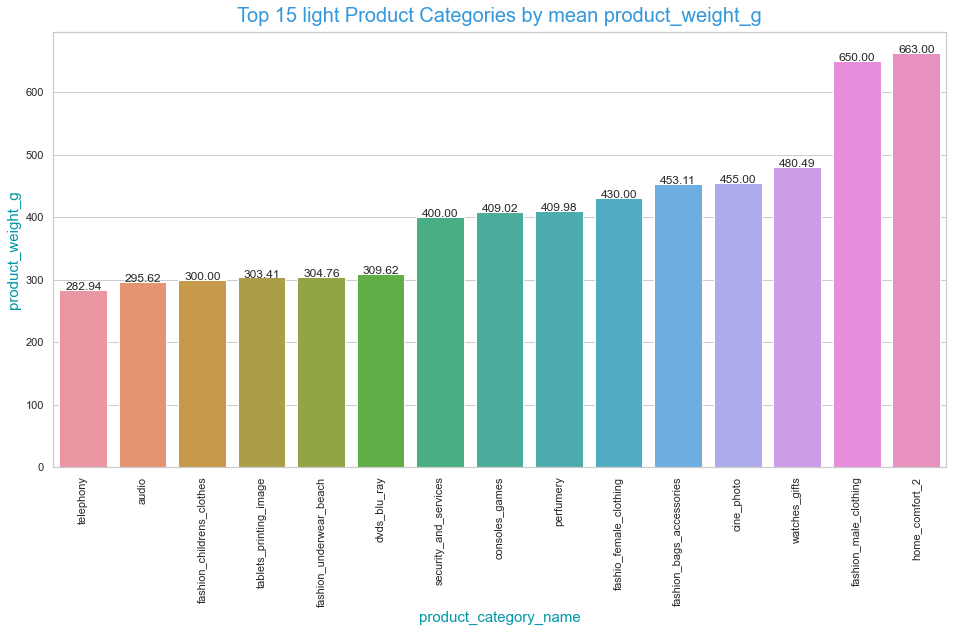

In [144]:
not_heavy=pivot_tab[['product_category_name','product_weight_g']].sort_values(by='product_weight_g',ascending=True).head(15)

# Top 15 light Product Categories by mean product_weight_g
bar_plot_new(16,8, not_heavy['product_category_name'],not_heavy['product_weight_g'] ,
         not_heavy, 'Top 15 light Product Categories by mean product_weight_g','product_category_name','product_weight_g', 90)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Product categories like office_furniture, furniture_bedroom, computers, home_appliances_2 etc. often conatians products which heavy beacause of their bulky  size and volume.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> The product categories which are light in weight are telephony, audio, fashion_childrens_clothes, tablets_printing_image, dvds_blu_ray, etc. as the products they contain may not be bulky in size and have low in volume.

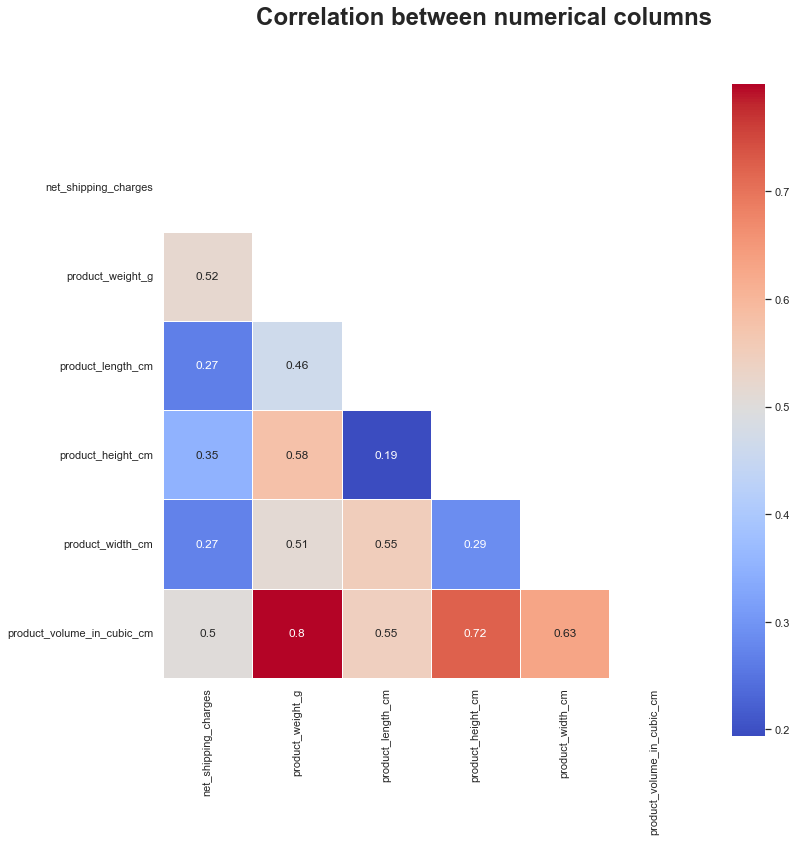

In [145]:
# Plotting a heatmap to check correlation of numerical columns 

num_var = order_items_products_df[['net_shipping_charges','product_weight_g', 'product_length_cm', 
                                   'product_height_cm', 'product_width_cm','product_volume_in_cubic_cm']]

plt.figure(figsize = (12,12))  ## Adjusting the figure size

Cmap = sns.color_palette("coolwarm", as_cmap=True)

matrix = np.triu(num_var.corr())

sns.heatmap(num_var.corr(), mask=matrix, annot = True, cmap = Cmap, square=True, linewidth = 1, 
            linecolor = 'white', cbar = True)  ## Plotting heatmap

plt.suptitle("Correlation between numerical columns \n", y = 0.97, 
             fontsize=24, fontweight='bold', ha='center') ## adding title to the figure

plt.show()

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> All the numerical variables in order_items_products_dfdataframe are positively correlated.
     
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange">  __'product_volume_in_cubic_cm'__ and __'product_weight_g'__ shares highest positive correlation of 0.8 while __'product_length_cm'__ and __'product_height_cm'__ has least correlation of 0.19.
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> __'product_volume_in_cubic_cm'__ is very well  correlated with all the other numeric variable like  __'product_height_cm'__, __'product_width_cm'__, __'product_length_cm'__, '__'product_weight_g'__' and __'net_shipping_charges'__.

In [146]:
## User defined function to plot count plot.

def count_plot(fig_X, fig_Y, data_X, data, Title_1, X_Label, Y_Label, X_Ticks_Rotation):
    
    plt.figure(figsize = (fig_X, fig_Y))  ## Setting figure size
    colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
    pal = sns.color_palette(colors,10,1)
    sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters
    
    ## Code for first plot
    ax = sns.countplot(x = data_X, data = data)  ## Code to plot Countplot in Seaborn
    
    plt.title(Title_1 , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
    plt.xlabel(X_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
    plt.ylabel(Y_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
    plt.xticks(rotation = X_Ticks_Rotation)  # Set text labels and properties.
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    
    plt.show()
    return

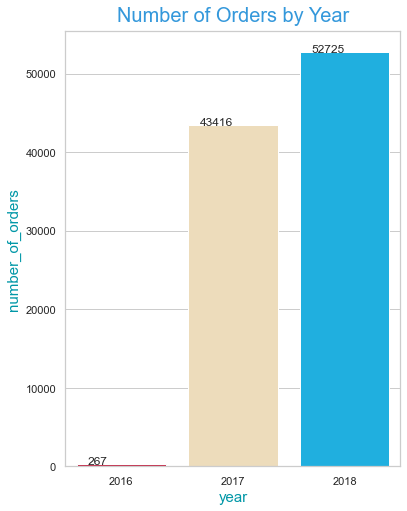

In [147]:
count_plot(6,8, order_df['order_purchase_timestamp'].dt.year, 
           order_df, 'Number of Orders by Year','year','number_of_orders', 0)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Olist has seen a rise in number of orders by approx. __'9.5K'__ which constitutes around 10% of all orders, in the year 2018 when compared with the year 2017.

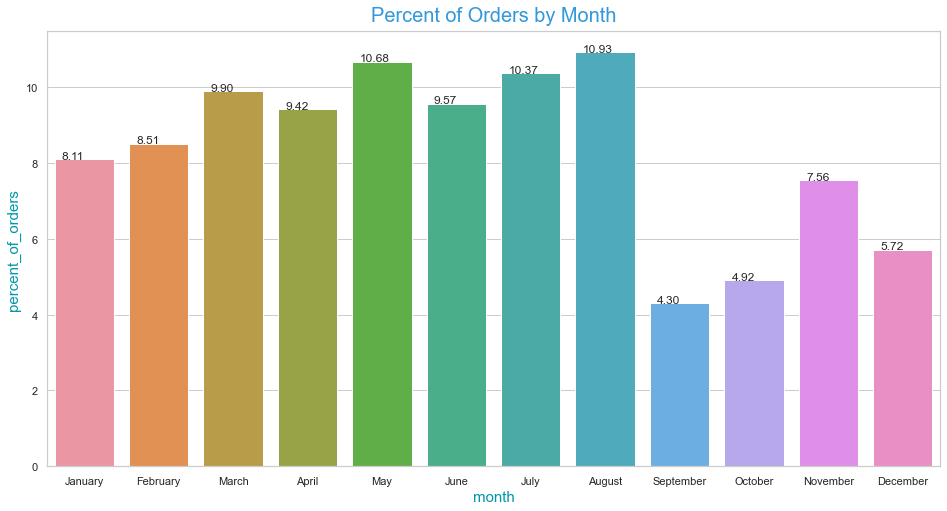

In [148]:
new_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_df=pd.DataFrame((order_df['order_purchase_timestamp'].dt.strftime('%B')).value_counts(normalize=True)*100)
month_df = month_df.reindex(new_month_order, axis=0)
month_df=month_df.reset_index()
month_df.columns=['month','number_of_customers']

bar_plot_new(16,8, month_df['month'], month_df['number_of_customers'], 
           month_df, 'Percent of Orders by Month','month','percent_of_orders', 0)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> The last 4 months of the year has seen a decline of orders approximately __'50%'__ except the month of November which has seen a decline of around __'25%'__ considering orders per month in other months at 100% over 2 years. 
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> Maximum numbers of orders per month comes between the month of March and August over 2 years.

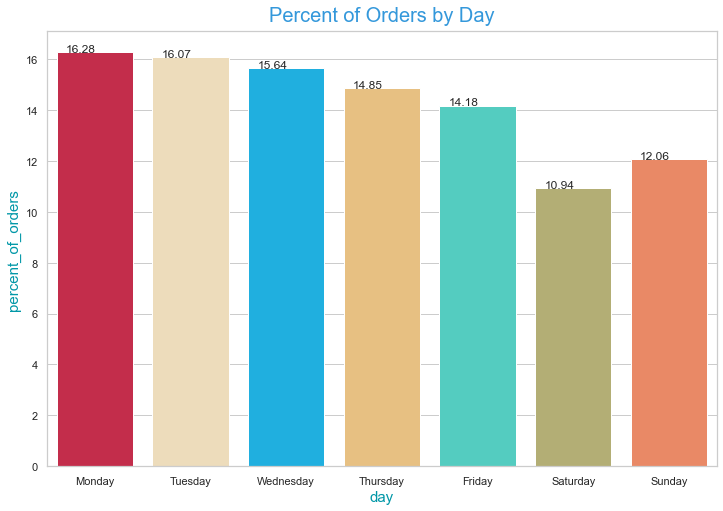

In [149]:
new_day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

day_df=pd.DataFrame((order_df['order_purchase_timestamp'].dt.strftime('%A')).value_counts(normalize=True)*100) 
day_df = day_df.reindex(new_day_order, axis=0)
day_df=day_df.reset_index()
day_df.columns=['day','number_of_customers']

bar_plot_new(12,8, day_df['day'], day_df['number_of_customers'] , 
           day_df, 'Percent of Orders by Day','day','percent_of_orders', 0)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> Less percentage of Olist customers orders on Saturday and Sunday but is it not the case with Monday, Tuesday and Wednesday on which number of orders are observed maximun over 2 years.

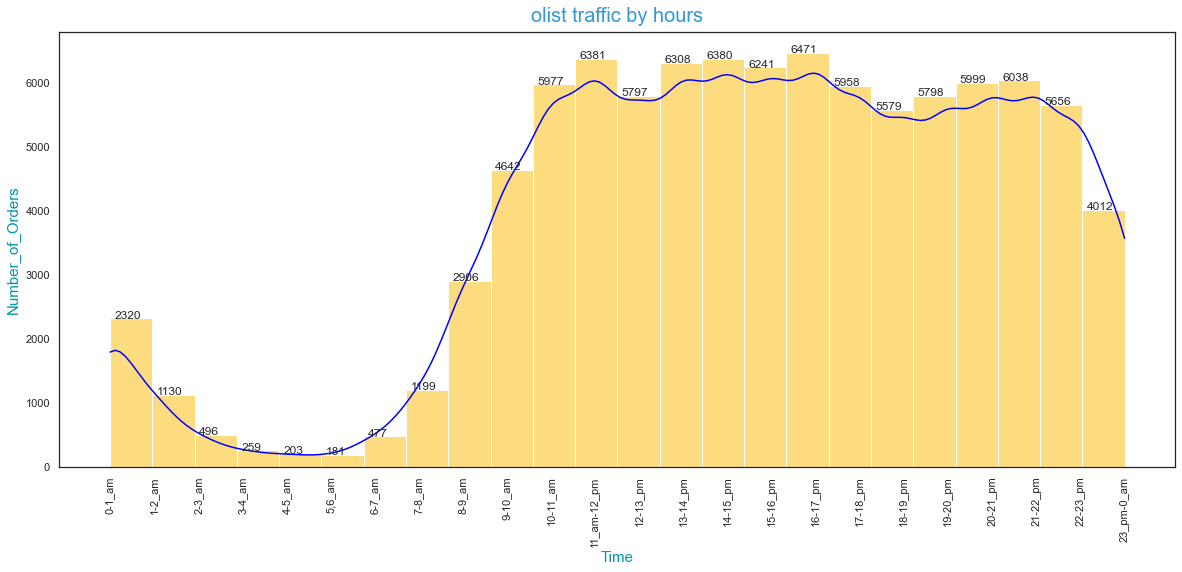

In [150]:
plt.figure(figsize = (20, 8))  ## Setting figure size
colors=['#fcb900','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)
sns.set_theme(style="white", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters

label=['0-1_am','1-2_am','2-3_am','3-4_am','4-5_am','5,6_am','6-7_am','7-8_am','8-9_am','9-10_am','10-11_am','11_am-12_pm',
'12-13_pm','13-14_pm','14-15_pm','15-16_pm','16-17_pm','17-18_pm','18-19_pm','19-20_pm','20-21_pm','21-22_pm','22-23_pm','23_pm-0_am']


## Code for  histplot
ax = sns.histplot(x = order_df['order_purchase_timestamp'].dt.hour, data = order_df, bins=24,kde=True)  ## Code to plot Countplot in Seaborn

plt.title('olist traffic by hours' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('Time', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Number_of_Orders', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

ticks =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(ticks=ticks,labels=label,rotation = 90)  # Set text labels and properties.
ax.lines[0].set_color('blue')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

plt.show()
    

In [151]:
# Getting values for specific time of a day 
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
specific_time_of_day = pd.cut(order_df['order_purchase_timestamp'].dt.hour, hours_bins, labels=hours_labels)
specific_time_of_day.head()

0    Morning
1    Morning
2      Night
3    Morning
4      Night
Name: order_purchase_timestamp, dtype: category
Categories (4, object): ['Early morning' < 'Morning' < 'Afternoon' < 'Night']

In [152]:
orders_in_specific_period = specific_time_of_day.value_counts()
orders_in_specific_period

Afternoon        36937
Night            27503
Morning          26902
Early morning     5066
Name: order_purchase_timestamp, dtype: int64

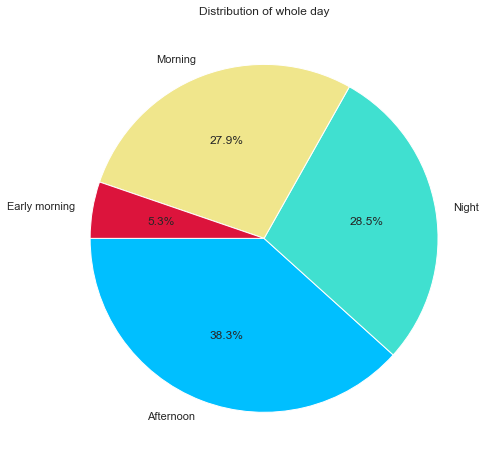

In [153]:
plt.figure(figsize=(8,8))
plt.title('Distribution of whole day')
plt.pie(orders_in_specific_period, labels=orders_in_specific_period.index, 
        autopct='%1.1f%%', startangle=180,colors=['DeepSkyBlue','Turquoise','Khaki','Crimson']);

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> __'38.3%'__ customers prefer to order in afternoon  which is between 1pm and 7pm.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> Approx. __'56%'__ customers prefer to order either in morning which is between 7am and 1pm or in night that is between 7pm and 12am.
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> Least number of customers of Olist choose to order early morning i.e. 12am to 7am only __'5.3%'__.

In [154]:
delivery_time= order_df['order_delivered_timestamp']-order_df['order_purchase_timestamp']
delivery_time=delivery_time.dt.components

In [155]:
delivery_time['hours']=round(delivery_time['hours']/24,4) # converting into days
delivery_time['minutes']=round(delivery_time['minutes']/(60*24),4) # converting into days
total_delivery_time=round((delivery_time['days']+delivery_time['hours']+delivery_time['minutes']),4)
total_delivery_time

0         8.4361
1         1.3285
2        13.7819
3         9.3938
4        13.2083
          ...   
96403     8.2173
96404    22.1931
96405    24.8590
96406    17.0861
96407     7.6743
Length: 96408, dtype: float64

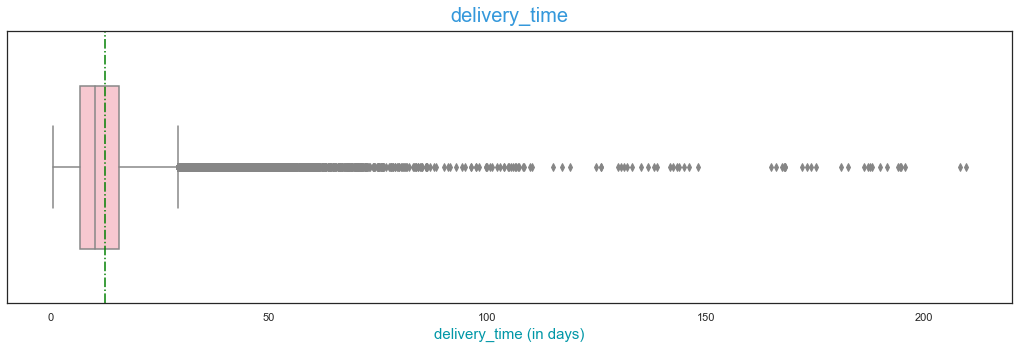

In [156]:
plt.figure(figsize = (18, 5))  ## Setting figure size
sns.boxplot(x = round(total_delivery_time,4), data = total_delivery_time, width=0.6, color= 'pink')
plt.title('delivery_time' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('delivery_time (in days)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
plt.axvline(round(total_delivery_time,4).mean(), color="green", linestyle='-.', label='mean') # Mean vertical line

plt.show()

In [157]:
# Number of On-Time and Late Delivered Orders
order_df['on_time_or_late'] = np.where(order_df['order_delivered_timestamp'] <= order_df['order_estimated_delivery_date'], 'on_time', 'late')
order_df['on_time_or_late'].value_counts(normalize=True)*100

on_time    91.885528
late        8.114472
Name: on_time_or_late, dtype: float64

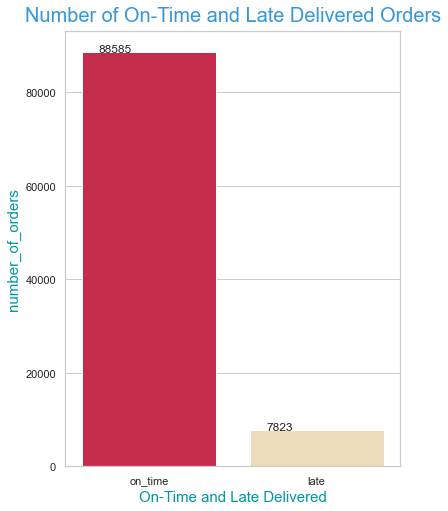

In [158]:
count_plot(6,8, order_df['on_time_or_late'], 
           order_df, 'Number of On-Time and Late Delivered Orders','On-Time and Late Delivered','number_of_orders', 0)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> The average delivery time taken by Olist to deliver the product is around 12 days.
    
- <font color="DarkBlue"> Comment 2 : <font color="Darkorange"> __'91.88%'__ of orders are delivered on time by Olist which is earlier than the order estimated delivery date and it is good for Olist business when orders delivered on time and new customers may want to try Olist.
    
- <font color="DarkBlue"> Comment 3 : <font color="Darkorange"> Only __'8.11%'__ of orders delivered late than the order estimated delivery date which is most likely due to certain reasons. And Olist can improve somewhat here. 

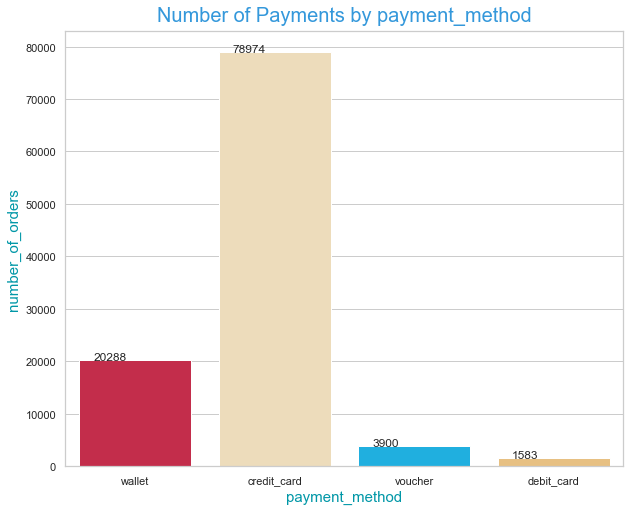

In [159]:
count_plot(10,8, order_items_products_df['payment_type'], 
           order_items_products_df, 'Number of Payments by payment_method','payment_method','number_of_orders', 0)

**`Comments:`** 
    
- <font color="DarkBlue"> Comment 1 : <font color="Darkorange"> 78974 i.e. around 75% of payments were made by credit cards over 2 years followed by 20288 payments made by wallet which is approx 20%.

#  <font color="#2980B9"> Task 6: Exporting Cleaned Data

In [160]:
path= os.getcwd()
path

"/Users/abhinavkumar/OneDrive/OneDrive's Dropbox/Upgrad/Course 7 Capstone Project/Module 3 Marketing and Retail Analytics - Capstone Project/Marketing_n_Retail_Capstone_Project_Final_Version/Data Cleaning"

In [161]:
path = "/Users/abhinavkumar/OneDrive/OneDrive's Dropbox/Upgrad/Course 7 Capstone Project/Module 3 Marketing and Retail Analytics - Capstone Project/Marketing_n_Retail_Capstone_Project_Final_Version/Data Cleaning/Cleaned_Marketing_n_Retail_Data_New.xlsx"

writer = pd.ExcelWriter(path=path, engine='xlsxwriter')

delivered_orders.to_excel(writer, sheet_name='delivered_orders',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['delivered_orders']

order_items_group_df.to_excel(writer, sheet_name='order_items_group_df',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['order_items_group_df']

customers.to_excel(writer, sheet_name='customers',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['customers']

products.to_excel(writer, sheet_name='products',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['products']

products_stats_group.to_excel(writer, sheet_name='products_stats_group',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['products_stats_group']

payments_summary.to_excel(writer, sheet_name='payments_summary',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['payments_summary']

order_items_summary_df.to_excel(writer, sheet_name='order_items_summary_df',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['order_items_summary_df']

order_df.to_excel(writer, sheet_name='order_ord_summary_cust_df',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['order_ord_summary_cust_df']

order_items_products_df.to_excel(writer, sheet_name='ord_items_prod_pay_df',index=False,header=True)
workbook = writer.bookworksheet = writer.sheets['ord_items_prod_pay_df']

open(path,'w')
writer.save()